# Foundations of Data Science: Final Project

Names: Catalina Becu, Jorn Diesveld, Rebecca Hess, Jorge Paredes

## Abstract
This project analyzes credit risk prediction using the German Credit Dataset, classifying individuals as good or bad credit risks based on financial and demographic factors. Seven machine learning models were evaluated: K-Nearest Neighbors (KNN), Random Forest, XGBoost, Logistic Regression, and its variations with Ridge, Lasso, and Elastic Net regularization. The models were compared using accuracy and ROC-AUC metrics. Random Forest performs best, with the highest accuracy and AUC (0.813), making it the most reliable model for distinguishing between "good" and "bad" credit risks. XGBoost and Elastic Net are competitive alternatives, while K-Nearest Neighbors shows the weakest performance (AUC 0.716). These findings highlight the importance of model evaluation in credit risk prediction and demonstrate that nonlinear approaches consistently outperform linear models in Supervised Learning for prediction. This analysis provides valuable insights into how machine learning can improve decision-making in financial contexts.


## Introduction
Credit risk assessment is a fundamental process for financial institutions, as it determines whether an individual is likely to meet their financial obligations. Accurate predictions in this area not only reduce potential losses but also help allocate credit resources more effectively. In this project, we use the German Credit Dataset, which consists of 1,000 observations. Each row represents an individual described by financial and demographic attributes, and a column classifying them as either a good or bad credit risk. This dataset provides a practical framework for evaluating the predictive power of machine learning models in a real-world financial setting.

The primary objective of this project is to predict an individual’s creditworthiness based on their attributes by employing and comparing different classification models. These models enable us to analyze patterns in the data, offering insights into how machine learning can be used to enhance decision-making processes in credit scoring systems. By comparing multiple models, we aim to determine which is most effective in this context, balancing accuracy, interpretability, and computational efficiency.

The machine learning models we test include both classical and modern approaches, such as distance-based algorithms (K-Nearest Neighbors), tree-based ensemble methods (Random Forest and XGBoost), and logistic regression enhanced with regularization techniques (Ridge, Lasso, and Elastic Net). Each model was chosen for its potential to address different aspects of the dataset. For example, ensemble methods are particularly suited for capturing complex feature interactions, while regularized logistic regression provides a transparent, interpretable framework for making predictions. This combination of techniques allows us to explore the balance between accuracy, complexity, and practical utility in credit scoring applications.

To evaluate the performance of these models, we rely on accuracy rates as well as the receiver operating characteristic. These metrics allow us to understand the trade-offs between sensitivity and specificity for each model. We calculate and compare the rates to assess their predictive capabilities. To enhance the interpretability of our results, we also include visualizations, such as accuracy plots, which clearly display the comparative performance of the models.

In conclusion, this project demonstrates how machine learning can be leveraged to improve credit risk classification. Our analysis emphasizes the importance of selecting appropriate models based on the specific requirements of a given application, such as balancing the need for high accuracy with the demand for transparency and ease of implementation. Ultimately, our findings highlight the potential of data science in addressing critical challenges in financial services, which contribute to more efficient and equitable credit allocation.


In [1]:
# Packages

options(repr.plot.width=15, repr.plot.height=12)

# Package installation and later call

if (!require('tidyverse')) suppressMessages(install.packages("tidyverse"))
if (!require('forcats')) suppressMessages(install.packages("forcats"))
if (!require('pheatmap')) suppressMessages(install.packages("pheatmap"))
if (!require('class')) suppressMessages(install.packages("class"))
if (!require('caret')) suppressMessages(install.packages("caret"))
if (!require('randomForest')) suppressMessages(install.packages("randomForest"))
if (!require('xgboost')) suppressMessages(install.packages("xgboost"))
if (!require('glmnet')) suppressMessages(install.packages("glmnet"))
if (!require('pROC')) suppressMessages(install.packages('pROC'))
if (!require('stargazer')) suppressMessages(install.packages('stargazer'))
if (!require('gridExtra')) suppressMessages(install.packages('gridExtra'))
if (!require('fastDummies')) suppressMessages(install.packages('fastDummies'))
if (!require('janitor')) suppressMessages(install.packages('janitor'))

suppressMessages(library(tidyverse))
suppressMessages(library(forcats))
suppressMessages(library(pheatmap))
suppressMessages(library(class))
suppressMessages(library(caret))
suppressMessages(library(randomForest))
suppressMessages(library(xgboost))
suppressMessages(library(glmnet))
suppressMessages(library(pROC))
suppressMessages(library(stargazer))
suppressMessages(library(gridExtra))
suppressMessages(library(fastDummies))
suppressMessages(library(janitor))

#Load Data
set.seed(1)
data <- read.csv('https://raw.githubusercontent.com/jparedes-m/DataScienceBSE/refs/heads/main/data/credit.csv') %>%
    select(age, personal_status, job, housing, savings_status, checking_status, credit_amount, duration, purpose, credit_history, property_magnitude, housing, existing_credits, num_dependents, foreign_worker, installment_commitment, residence_since, class) %>%
    separate(personal_status, into = c("sex", "p_status"), sep = " ") %>%
    mutate(class = ifelse(class == "good", 0, 1)) %>%
    mutate(savings_status = case_when(
        savings_status == "no known savings" ~ 'no known savings',
        savings_status == "<100" ~ "little",
        savings_status == "100<=X<500" ~ 'moderate',
        savings_status == "500<=X<1000" ~ 'quite rich',
        savings_status == ">=1000" ~ 'rich',
        TRUE ~ NA)) %>%
    mutate(checking_status = case_when(
        checking_status == 'no checking' ~ "no checking",
        checking_status == "<0" ~ 'little',
        checking_status == "0<=X<200" ~ 'moderate',
        checking_status == ">=200" ~ 'rich',
        TRUE ~ NA)) %>%
  mutate(repayment_burden = credit_amount / duration) %>%
  rename(savings_account = savings_status, checking_account = checking_status) %>%
  mutate(checking_account = as.factor(checking_account), savings_account = as.factor(savings_account), property_magnitude = as.factor(property_magnitude)) %>%
  relocate(class)

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: pheatmap

Loading required package: class

Loading required package: caret

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: randomForest

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:




## Data Description
The dataset provided is a German credit dataset containing 1,000 entries, each representing an individual’s credit information.
It includes 19 variables related to personal, financial, and credit-related aspects. The data set captures individual attributes such
as age, sex, marital status, housing type, residency duration, number of dependents, and foreign worker status. Key financial
variables include balances in both savings and checking accounts, credit history, and the number of existing credits held at the
same bank. We have credit request details including the requested credit amount, the duration of the credit, the purpose of the
credit request, the property magnitude (e.g., life insurance, real estate, or car) that can be leveraged against the credit request,
and installment commitment, representing the individual’s monthly disposable income allocated towards credit payments.
Additionally, we have the repayment burden calculated as the ratio of the credit amount to its duration, representing the
individual’s temporal payment obligation. Finally, the variable we are trying to predict is ”class”: the classification of the credit
request as ”good” or ”bad”.

First we check for missing data.


In [2]:
#Check for Missing Data
sapply(data, \(x) 100*mean(is.na(x)))
#There is none

class                    age                    sex 
                     0                      0                      0 
              p_status                    job                housing 
                     0                      0                      0 
       savings_account       checking_account          credit_amount 
                     0                      0                      0 
              duration                purpose         credit_history 
                     0                      0                      0 
    property_magnitude       existing_credits         num_dependents 
                     0                      0                      0 
        foreign_worker installment_commitment        residence_since 
                     0                      0                      0 
      repayment_burden 
                     0

To analyze the relationships between variables, we first converted the categorical variables into binary variables, leaving out the
most frequent group as the reference category.

Now we graph the frequency of the categorical variables for each class to see if there are features that may help us distinguish between classes.

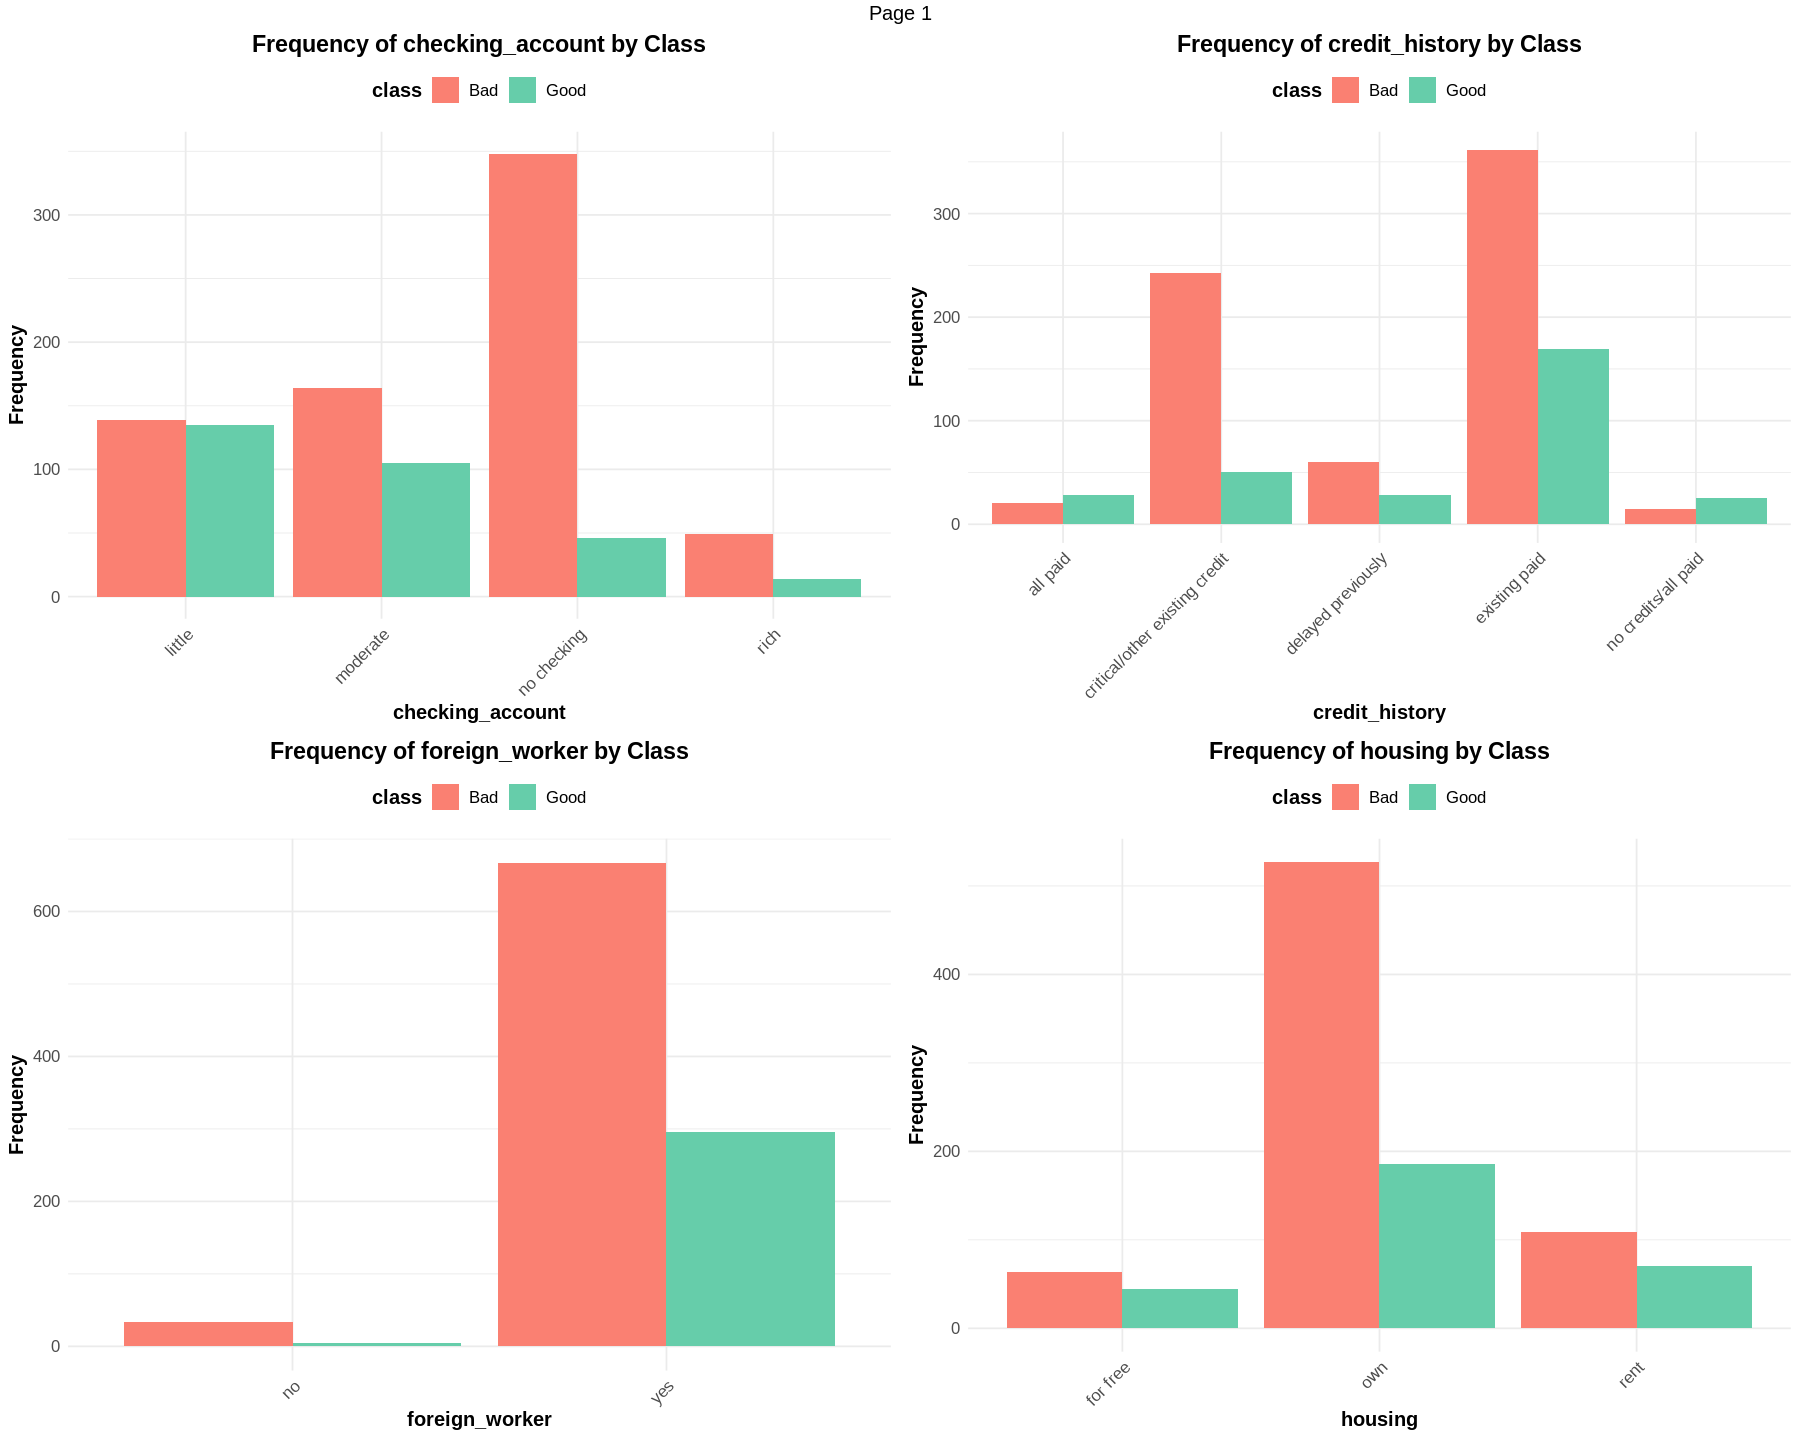

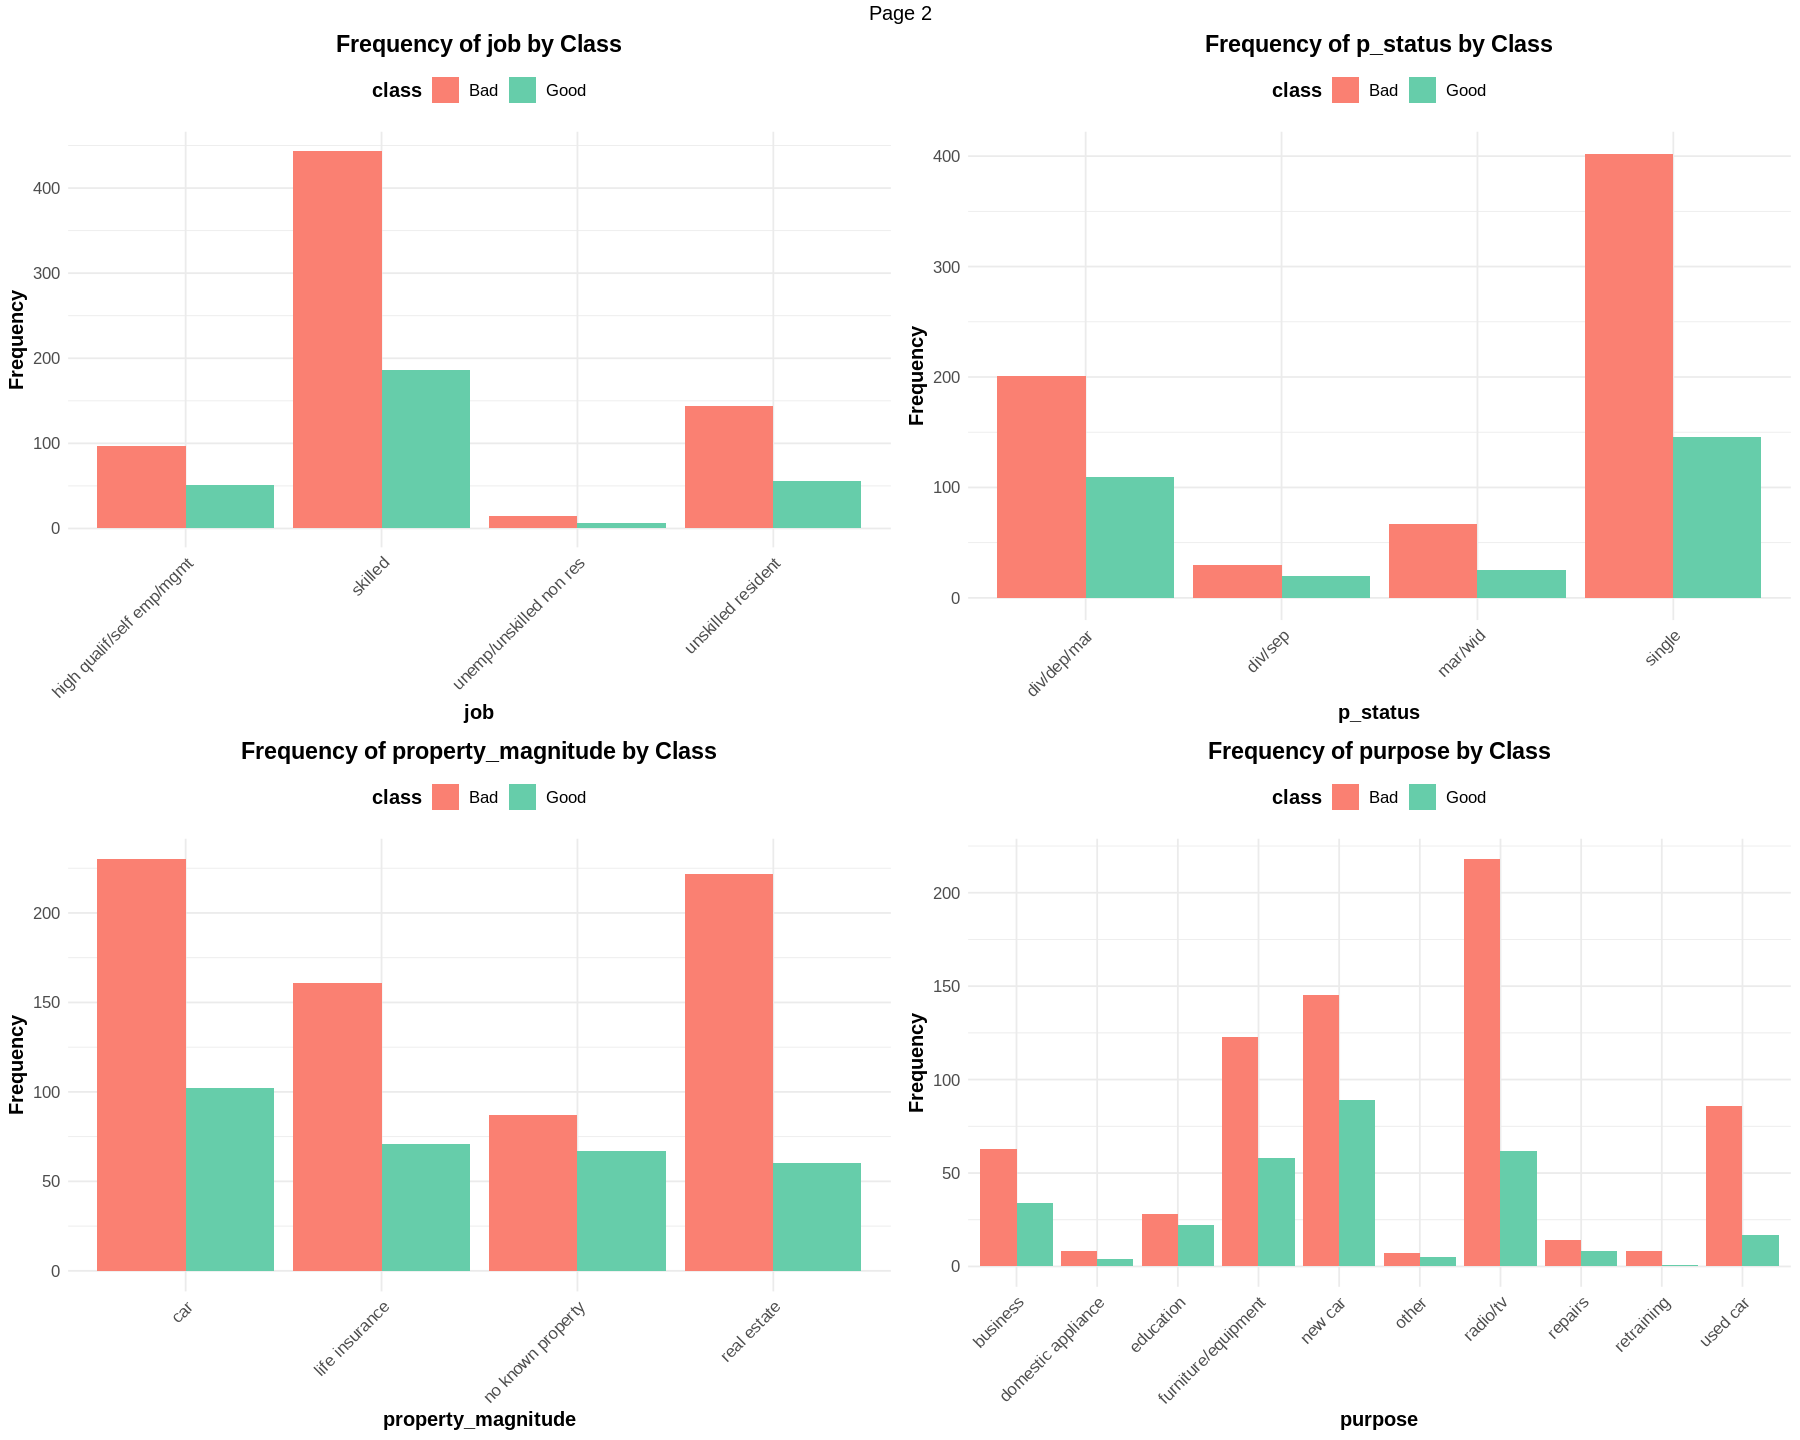

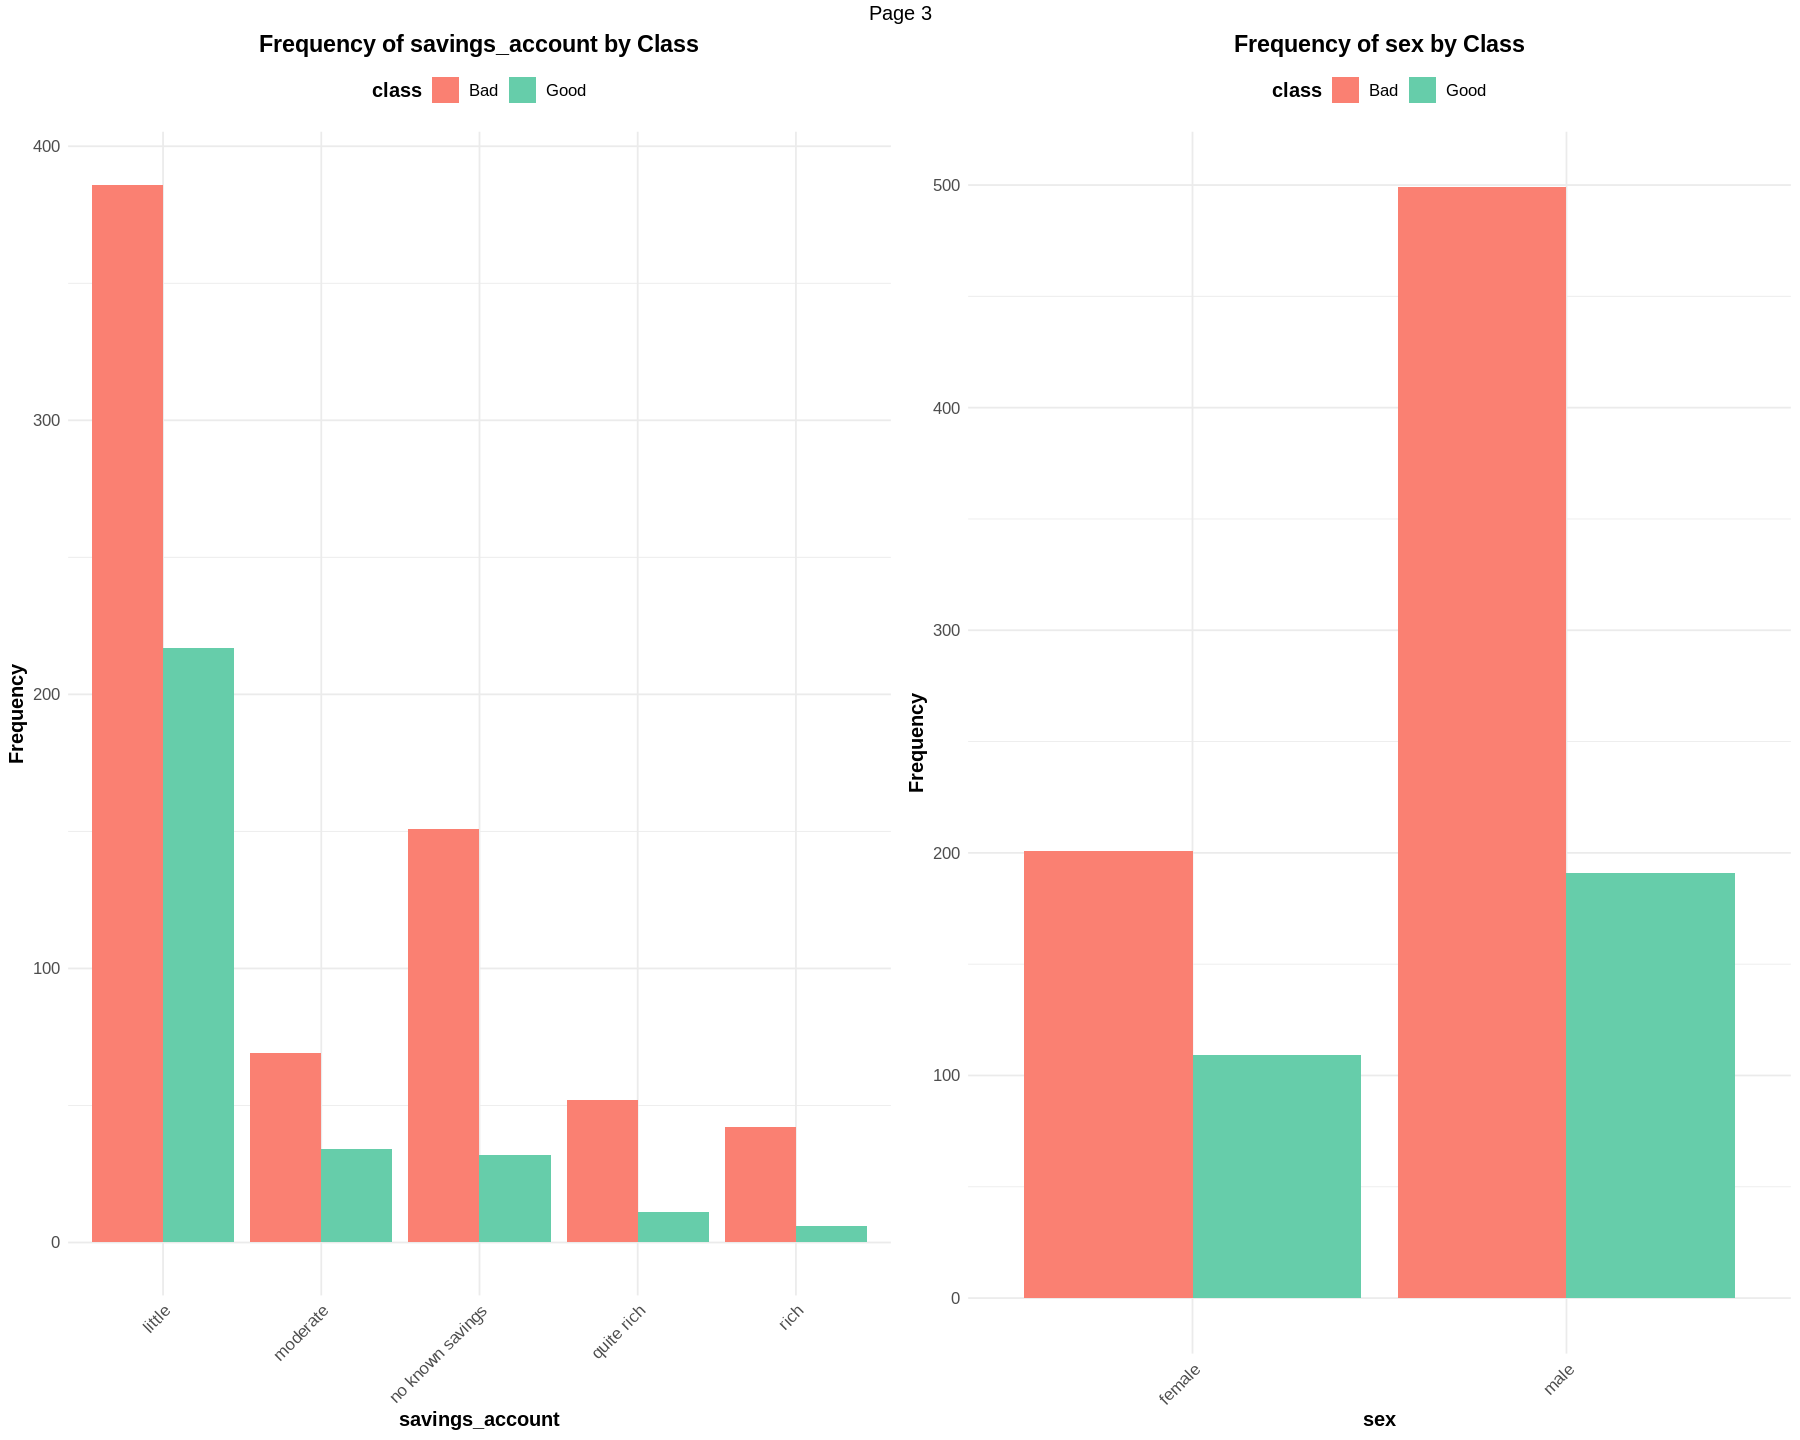

In [3]:
# Ensure 'class' is a factor
data$class <- as.factor(data$class)

cat_vars <- c("sex", "p_status", "job", "housing", "savings_account",
              "checking_account", "purpose", "credit_history",
              "property_magnitude", "foreign_worker")

melted_data <- data %>%
  select(class, all_of(cat_vars)) %>%
  pivot_longer(cols = all_of(cat_vars), names_to = "Variable", values_to = "Category") %>%
  group_by(Variable, Category, class) %>%
  summarise(Frequency = n(), .groups = "drop")

plot_list <- list()
for (var in unique(melted_data$Variable)) {
  plot_data <- melted_data %>% filter(Variable == var)

  p <- ggplot(plot_data, aes(x = Category, y = Frequency, fill = class)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title = paste("Frequency of", var, "by Class"),
         x = var, y = "Frequency") +
    scale_fill_manual(values = c("salmon", "mediumaquamarine"),
                      labels = c("Bad", "Good")) +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
      axis.text.y = element_text(size = 10),
      axis.title.x = element_text(size = 12, face = "bold"),
      axis.title.y = element_text(size = 12, face = "bold"),
      plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
      legend.position = "top",
      legend.title = element_text(size = 12, face = "bold"),
      legend.text = element_text(size = 10)
    )

  # Add the plot to the list
  plot_list[[var]] <- p
}

# Arrange plots into a grid layout (4 per page)
num_plots <- length(plot_list)
plots_per_page <- 4
pages <- ceiling(num_plots / plots_per_page)

for (page in 1:pages) {
  start_idx <- (page - 1) * plots_per_page + 1
  end_idx <- min(page * plots_per_page, num_plots)
  current_plots <- plot_list[start_idx:end_idx]

  capture.output({
    grid.arrange(grobs = current_plots, ncol = 2, top = paste("Page", page))
  })
}


From these graphs we note that foreign workers, male, radio/TV purpose and singles have more frequency in bad class,
which could be a good insight for prediction.

Then we analyze the correlation of the predictors with each other
as well as with our response variable "class" in a correlation heatmap.


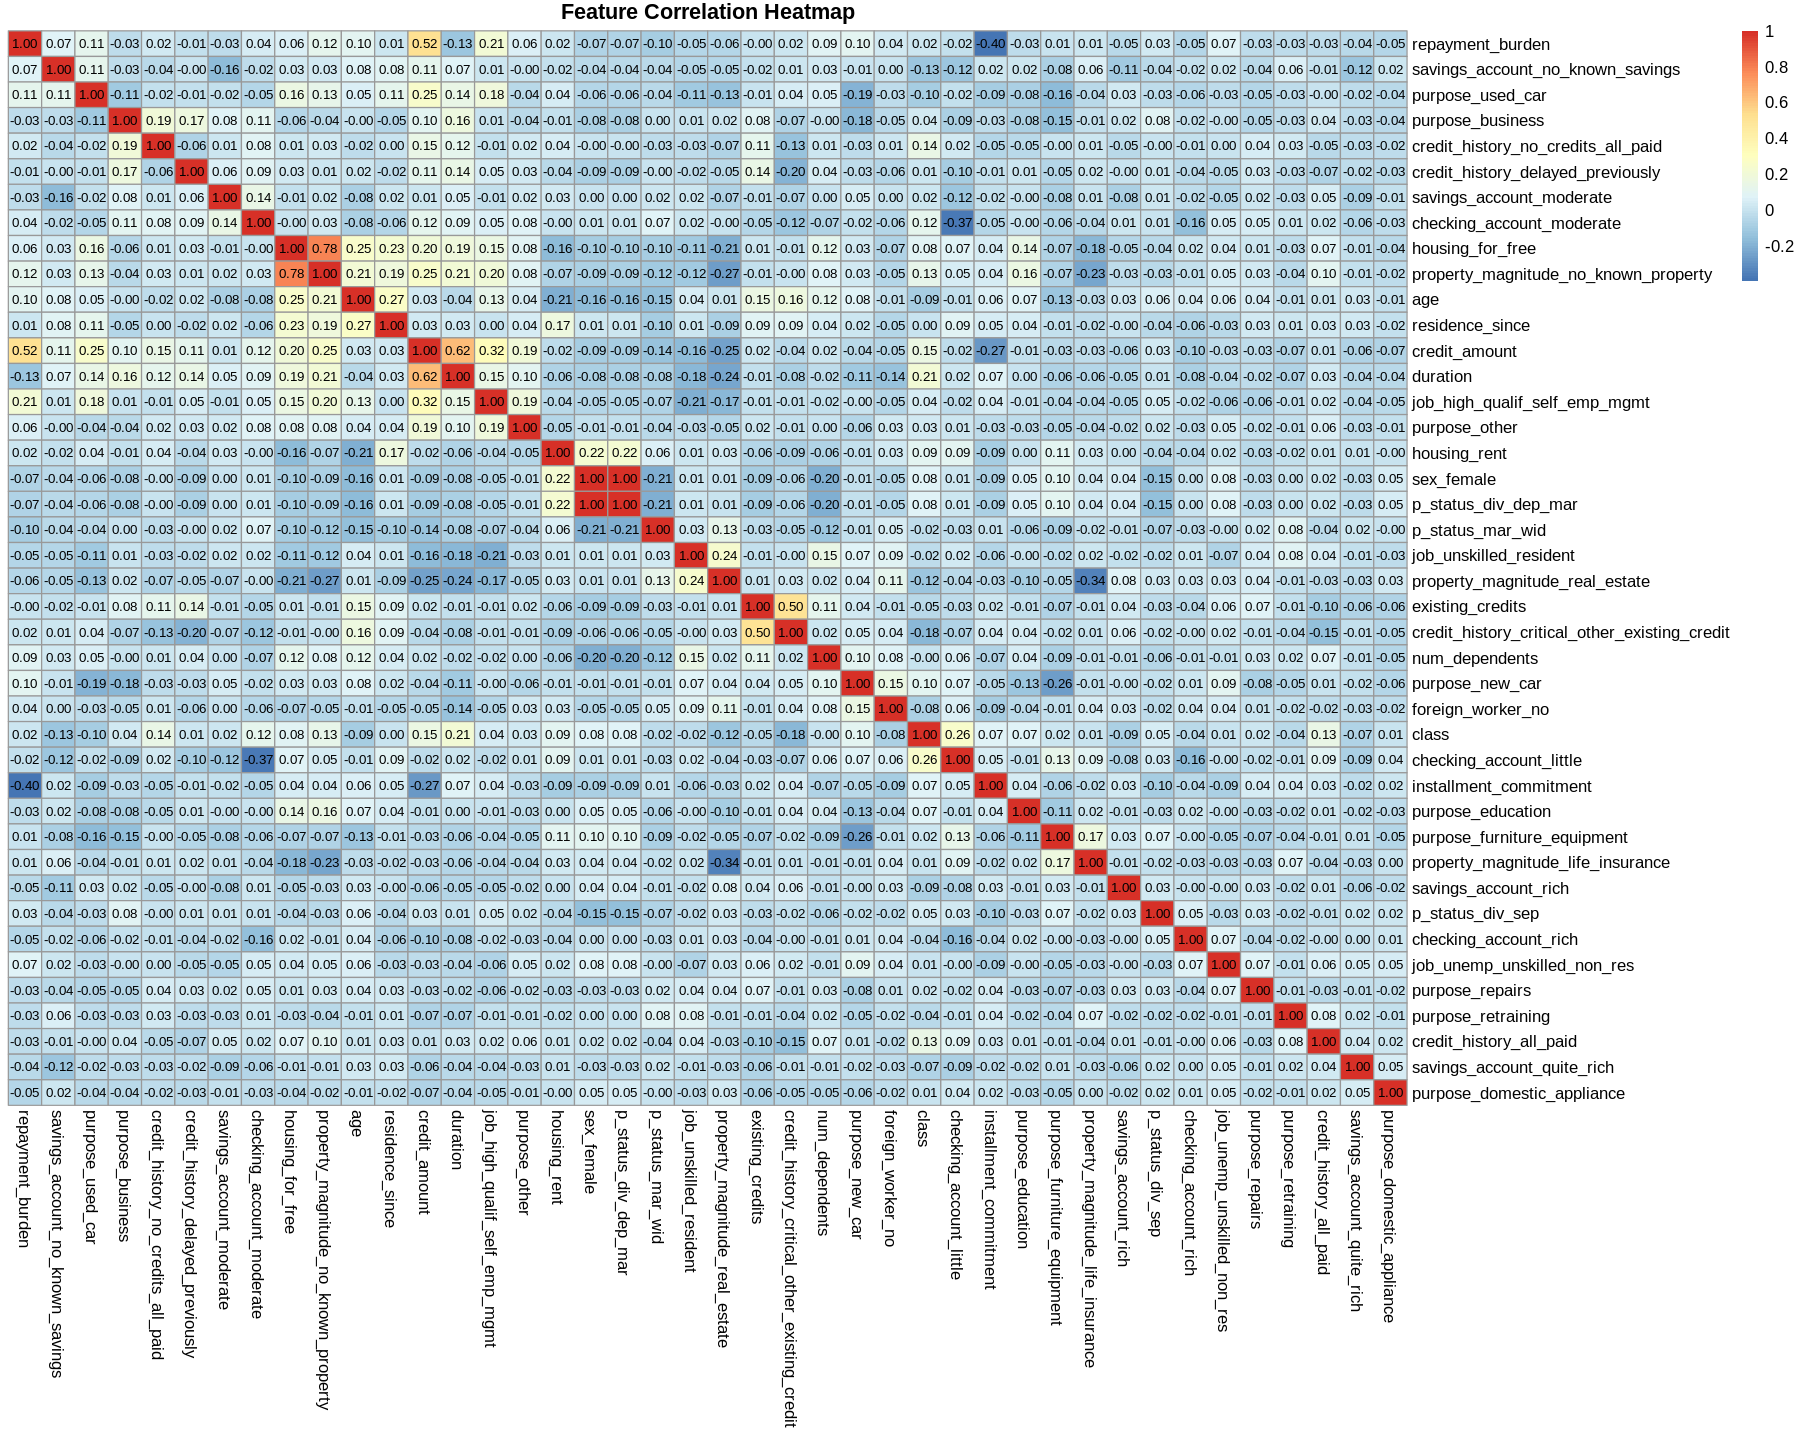

In [4]:
# Correlation heatmap
data <- data %>% mutate(class = as.numeric(class)-1)
# Create dummy columns
df_cat <- dummy_cols(
  data,
  select_columns = cat_vars,
  remove_first_dummy = FALSE, remove_most_frequent_dummy = TRUE,  ignore_na = FALSE,
  remove_selected_columns = TRUE,
  omit_colname_prefix = FALSE) %>%
  # clean column names
  janitor::clean_names() %>%
  mutate_if(is.integer, as.numeric)

map <- pheatmap(cor(df_cat, use = "complete.obs"),
                display_numbers = TRUE,
                number_color = "black",
                main = "Feature Correlation Heatmap", treeheight_row = F, treeheight_col = F)

We can see that the variables with a correlation absolute value of ρ above or equal to 0.15 with the "class" variable are:
duration and credit amount, checking account ”little” or no checking account, credit history - critical/other existing credit and
savings account ”little”, which is intuitive in the sense of predicting risky clients.

Numerical Variable Distributions:

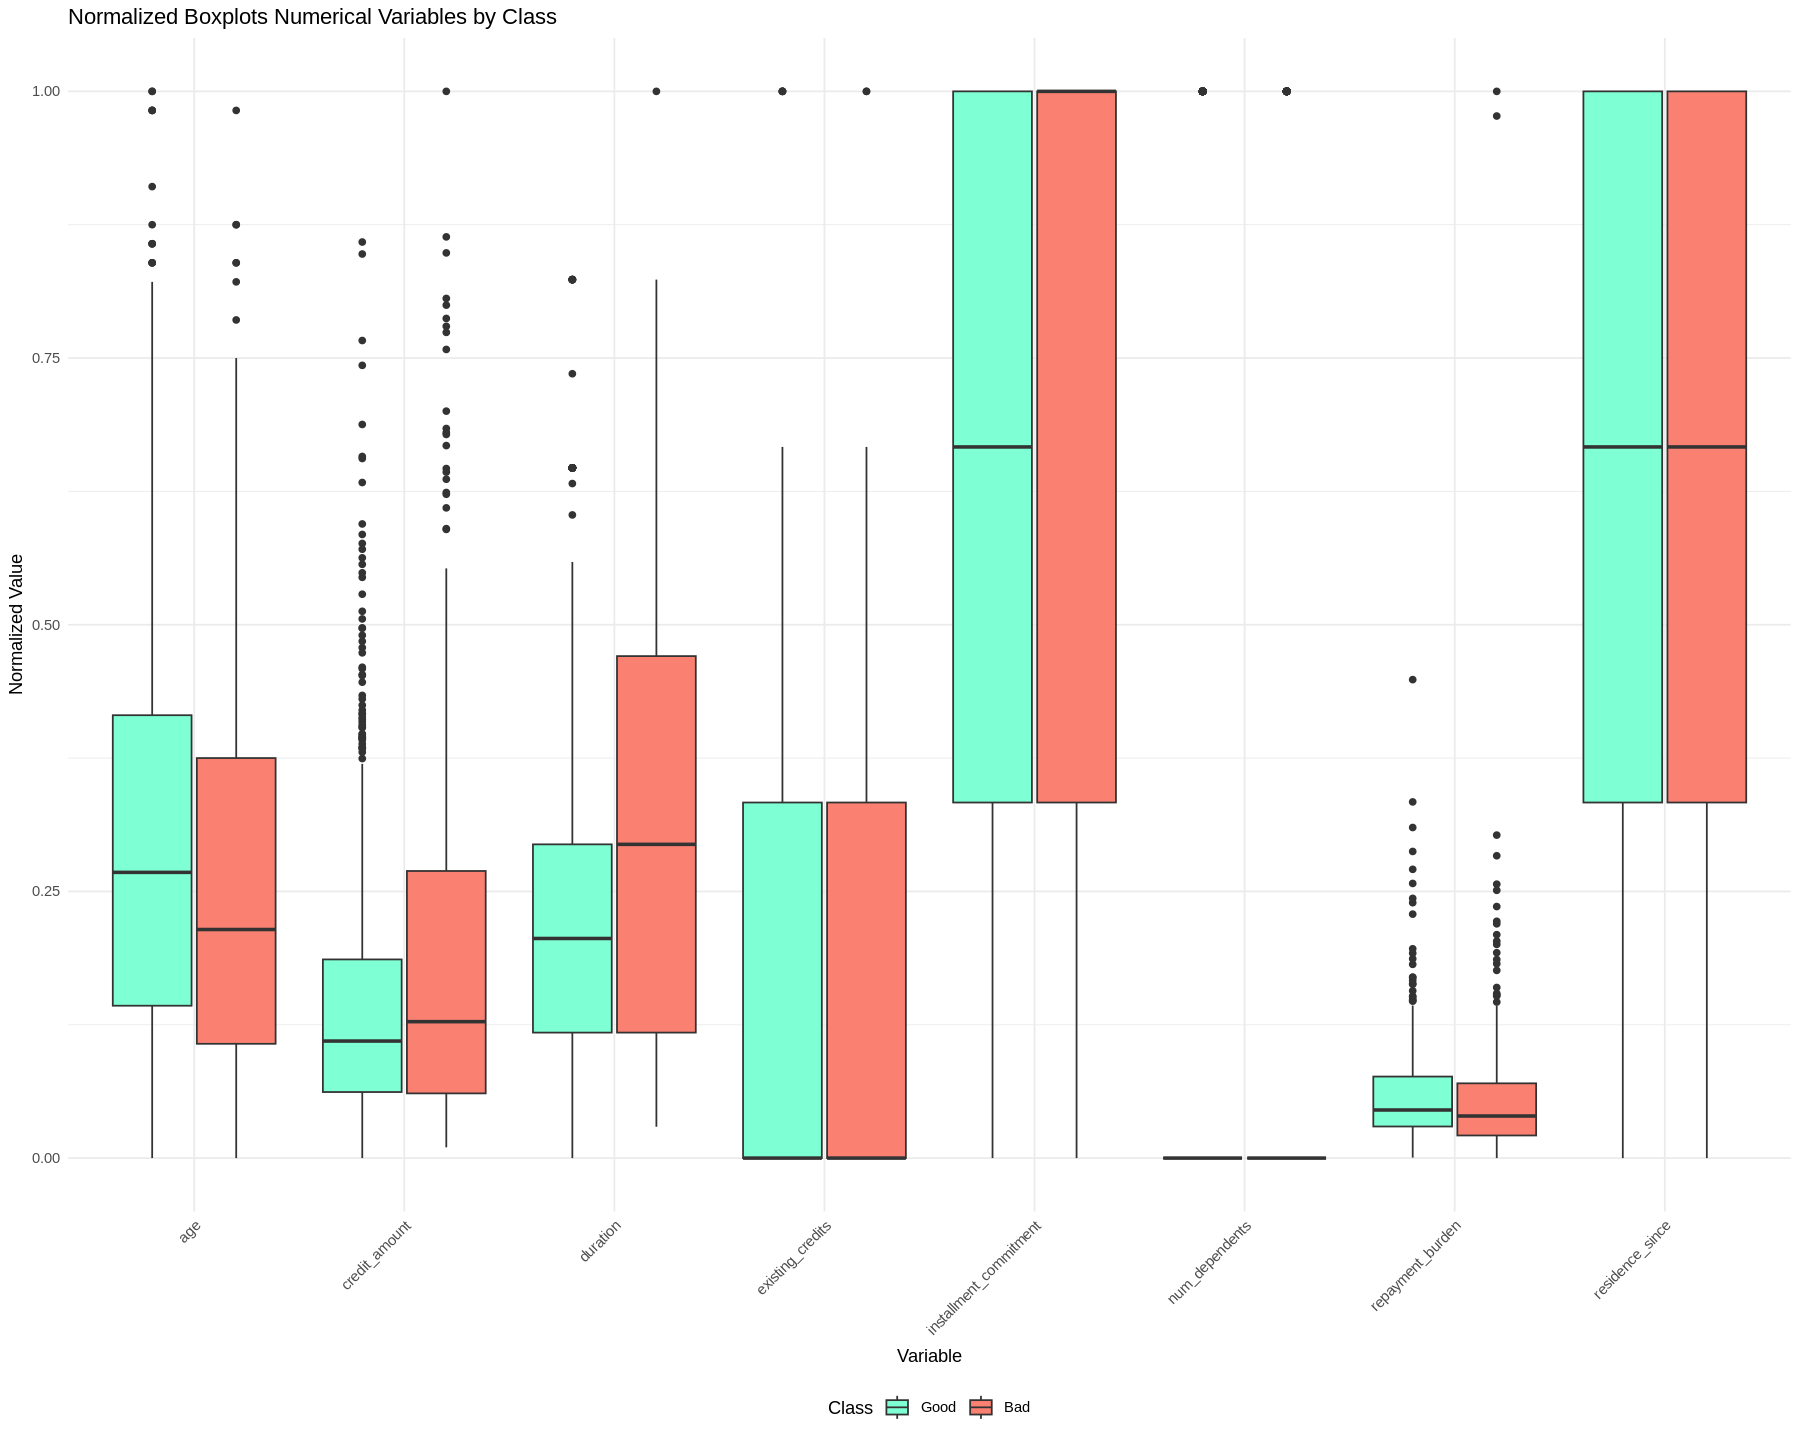

In [5]:
# Preprocessing
# Specify the variable of interest
target_variable <- "class"

# Analysis of the variables that likely need transformation of some kind
numerical_vars <- c("age", "credit_amount", "repayment_burden", "duration", "installment_commitment", "num_dependents", "existing_credits", "residence_since")

# Normalize the selected variables (min-max scaling)
data_normalized <- data %>%
  mutate(across(all_of(numerical_vars), ~ (. - min(.)) / (max(.) - min(.))))

# Reshape data to long format
data_normalized <- data_normalized %>%
  pivot_longer(cols = all_of(numerical_vars), names_to = "Variable", values_to = "Value")

ggplot(data_normalized, aes(x = Variable, y = Value, fill = as.factor(class))) +
  geom_boxplot(position = position_dodge(width = 0.8)) +
  labs(
    title = "Normalized Boxplots Numerical Variables by Class",
    x = "Variable",
    y = "Normalized Value",
    fill = "Class"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  scale_x_discrete(guide = guide_axis(angle = 45)) +  # Rotate x-axis labels for clarity
  scale_fill_manual(
    values = c("0" = "aquamarine", "1" = "salmon"),
    labels = c("0" = "Good", "1" = "Bad")
  )

By normalizing the numerical variables to a scale of 0 to 1 using their respective minimum and maximum values, we are able to plot their boxplots on the same axis. Grouping them by credit classification, we can easily see how the distributions of each variable differ depending on whether they are considered "good" or "bad." This offers some insight into the impact of the numerical variables on the credit classification. Additionally, regardless of credit classification, we can see the distributions are right-skewed for age, credit_amount, duration, and repayment_burden, which we will address in the cleaning and preparation section. We can also easily identify outliers in the repayment burden variable.

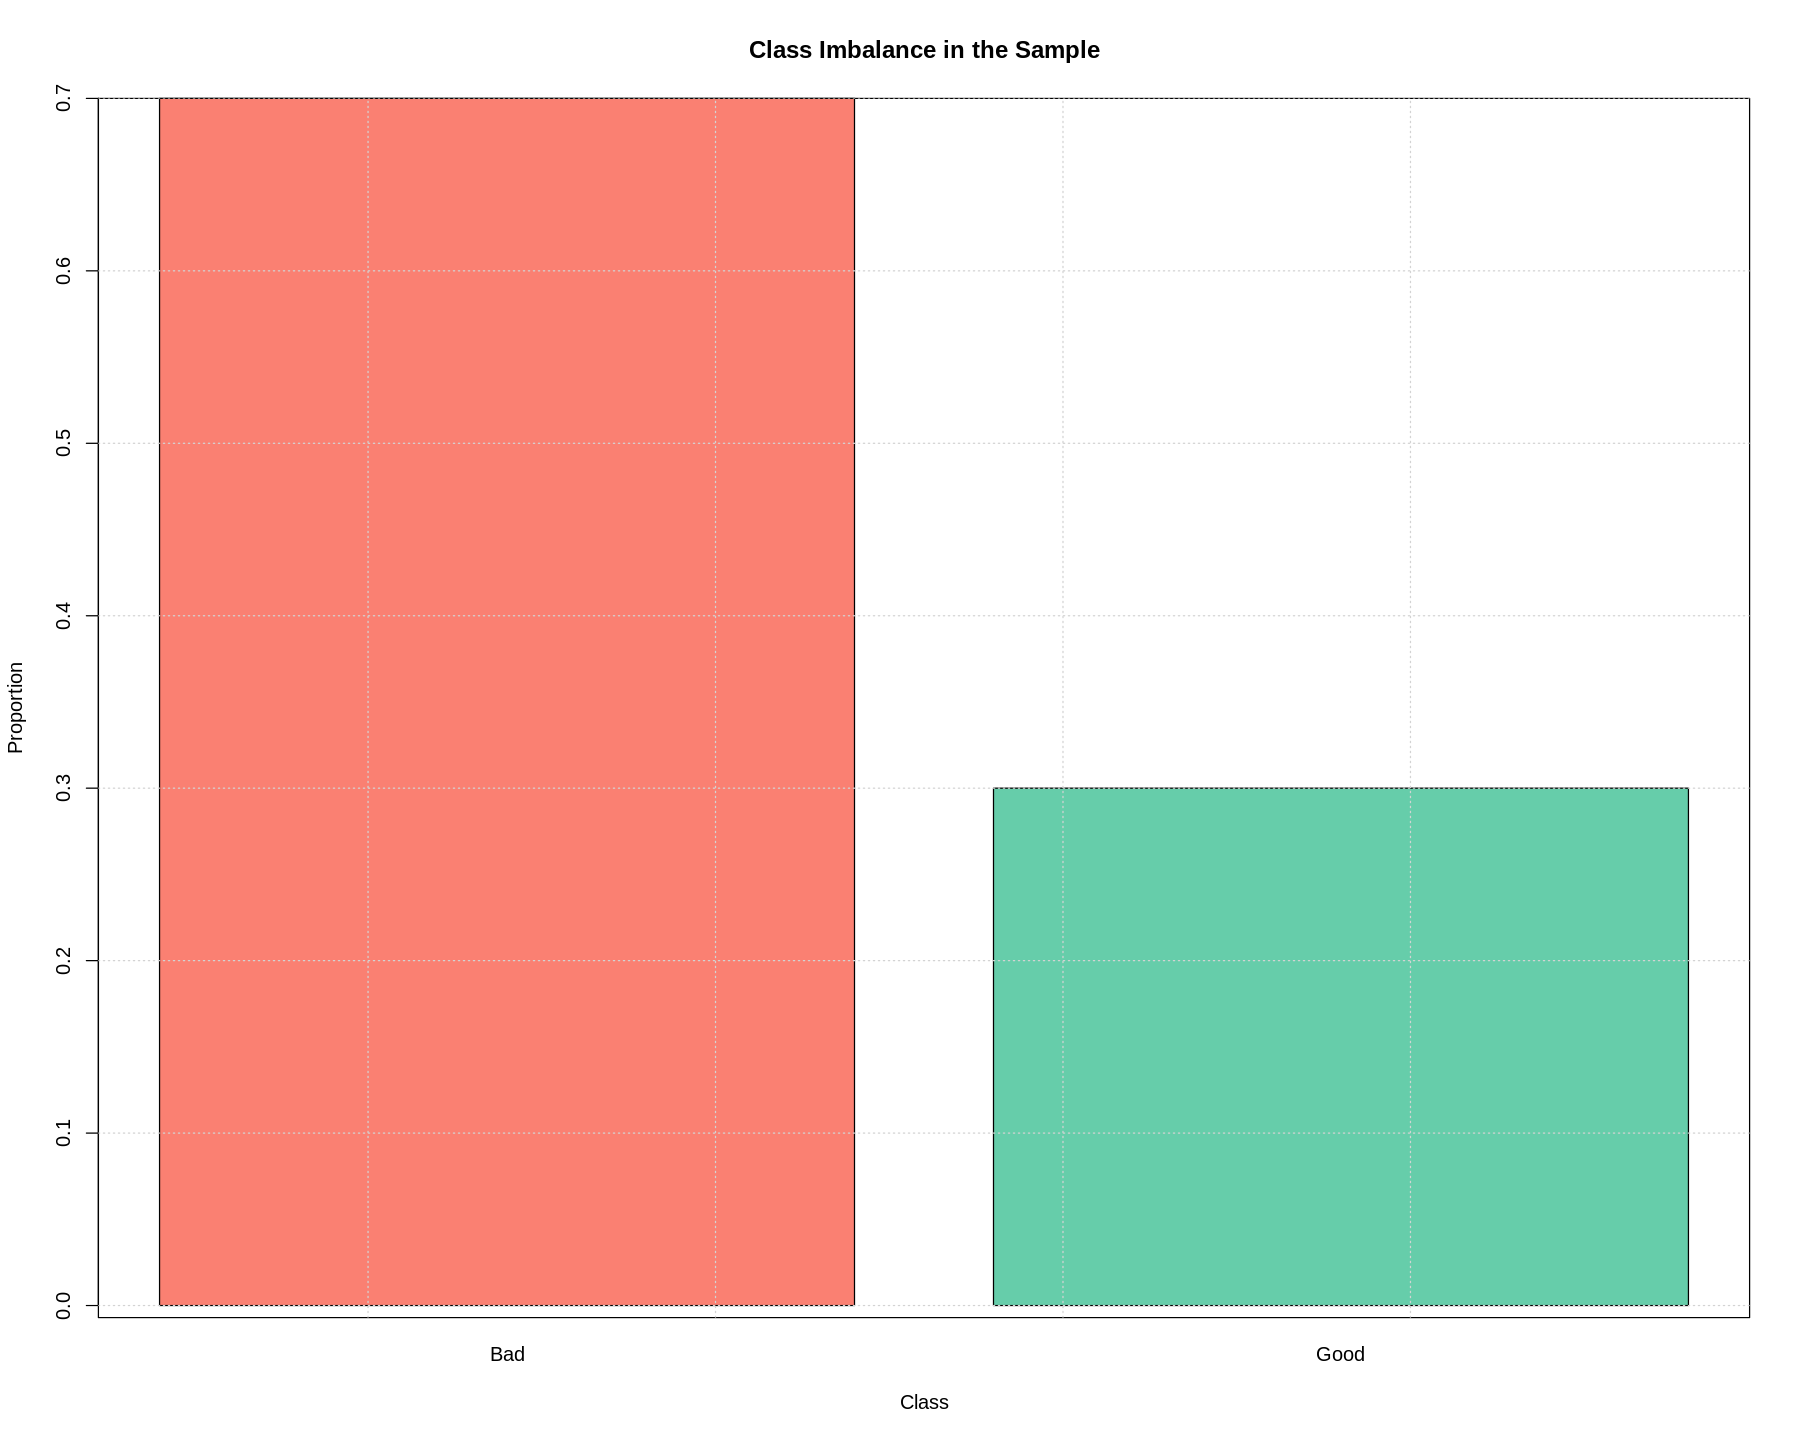

In [6]:
# @title Class imbalance
# Calculate the proportion of each class
class_proportions <- table(data$class) / nrow(data)

# Set up a single plot
par(mfrow = c(1, 1))  # Single plot layout

# Create the bar plot
barplot(class_proportions,
        names.arg = c("Bad", "Good"),  # Class names
        main = "Class Imbalance in the Sample",  # Title
        col = c("salmon", "mediumaquamarine"),  # Bar colors
        ylab = "Proportion",  # Y-axis label
        xlab = "Class")  # X-axis label

# Add a border box around the plot
box()

# Add a grid for better visualization
grid()

rm(class_proportions, num_plots, pages, plot_list, plots_per_page, start_idx, end_idx, current_plots, melted_data, plot_data, p, page, var)

As we can see, 70% of the sample points are ”good” borrowers, and 30% are ”bad” which represents a class imbalance issue. An imbalanced class could make it difficult for classification models to learn the minority
group and cause bias toward the majority. We will address a solution for this in the following section.

## Cleaning and Preparation

The raw data of the German Credit Database required some cleaning and transformations to make it suitable for machine learning models. Our goal was to ensure compatibility with the algorithms while retaining interpretability and maximizing the predictive power of the features.

The first step was selecting only the features relevant to predicting credit risk, such as `age`, `credit_amount`, `savings_status`, and `checking_status`. Selecting a smaller, relevant subset of features reduced noise, improved computational efficiency and made the data more interpretable.

One challenge in the raw dataset was combined variables, such as `personal\_status`, which included both gender and marital status. This column was split into two separate variables, `sex` and `p_status`, allowing independent analysis of their effects on creditworthiness as gender and marital status may influence credit risk differently.

The target variable, which classified individuals as “good” or “bad” credit risks, was transformed into a binary numeric format. Encoding “good” as 0 and “bad” as 1 made it compatible with machine learning models and framed the problem as a binary classification task.

Categorical variables, such as job, `savings_status`, and `checking_status`, were reclassified into simplified categories. For example, job was encoded based on skill level, ranging from unskilled to highly qualified, while account statuses were grouped into levels like “little,” “moderate,” and “rich.” This reclassification reduced the complexity of these features and addressed sparsity issues, where some categories had very few observations. Simplifying these variables also improved interpretability, as the categories became more meaningful and easier to analyze.

A key engineered feature was `repayment_burden`, calculated as the ratio of `credit_amount` to `duration`. This feature captured the financial strain of loan repayment, a potentially strong predictor of credit risk. Additionally, squared versions of numerical features, such as `age` and `credit_amount`, were introduced to allow models to capture non-linear relationships. For instance, the squared terms could highlight situations where risk increases disproportionately with larger loan amounts or longer durations.

To ensure uniformity across variables, all numerical features were normalized to have a mean of 0 and a standard deviation of 1. Normalization was particularly important for distance-based algorithms like K-Nearest Neighbors and for gradient-boosting models that can be sensitive to feature scaling. Without normalization, variables with larger ranges, such as `credit_amount`, could dominate the learning process, leading to biased results. Standardizing the data ensured that all features contributed equally to the model.

Categorical variables were converted into binary, dummy variables, assigning 0 or 1 to each category within a feature. This step was crucial for algorithms that cannot handle non-numeric data, such as logistic regression and XGBoost. Label encoding preserved the distinctiveness of each category while making the dataset fully numeric and compatible with a range of machine learning models.

In [7]:
# Feature Engineering
df <- data
df <- df[df$repayment_burden < 1000,] # Remove outliers in repayment_burden
#address right skew with a log transformation in age and duration
df <- df %>% mutate(age = log(1 + age)) # Log-transform age
df <- df %>% mutate(duration = log(1 + duration)) # Log-transform duration
df <- df %>% mutate(
  credit_amount2 = credit_amount^2,
  num_dependents2 = num_dependents^2,
  repayment_burden2 = repayment_burden^2
)

# Standardize numeric variables
num_vars <- c('credit_amount', 'installment_commitment', 'residence_since', 'existing_credits', 'num_dependents', 'credit_amount2', 'num_dependents2', 'repayment_burden', 'repayment_burden2')
df <- df %>% mutate(across(all_of(num_vars), scale))

## Methodology and results
The process of building and evaluating machine learning models for predicting credit risk was structured and systematic, incorporating multiple algorithms to assess their performance. Each model was trained on a balanced data set, created through under-sampling to address the class imbalance. This ensures that the models learn from both classes equally, preventing bias towards the majority class. To prevent over-fitting and provide a reliable assessment of model performance, a 75/25 train-test split was employed. This approach involves training the models on 75\% of the data and evaluating them on the remaining 25\%. Additionally, 7-fold cross-validation was utilized to further enhance model reliability and reduce the impact of data variability. To evaluate the performance of the models, accuracy plots and ROC curves, along with their corresponding AUC scores, will be presented. These metrics provide insights into the models' ability to accurately classify instances and their discrimination power, respectively.

In [8]:
# Train-Test Split and Class Imbalance
# Models
##Train-test split
train_index <- sample(1:nrow(df), 0.75 * nrow(df))
X <- df %>% select(-class)
y <- factor(df$class, levels = c(0,1), labels = c("good", "bad"))

train_x <- X[train_index, ]
train_y <- y[train_index]

test_x <- X[-train_index, ]
test_y <- y[-train_index]

# how to adress class imbalance:
train_data <- cbind(train_x, class = train_y)
majority <- train_data %>% filter(class == "good")
minority <- train_data %>% filter(class == "bad")
majority_undersampled <- majority %>% sample_n(nrow(minority))

train_data_balanced <- bind_rows(majority_undersampled, minority)
train_data_balanced <- train_data_balanced %>% sample_frac(1)

train_x <- train_data_balanced %>% select(-class)
train_y <- train_data_balanced$class

### KNN
The K-Nearest Neighbors (KNN) algorithm is a classification technique that assigns a class label to a new data point based on the majority class of its $k$ nearest neighbors. In the context of credit risk assessment, KNN can be particularly useful. By calculating the distance between a new credit applicant and existing customers, the algorithm identifies the $k$ most similar customers. The majority creditworthiness among these $k$ neighbors is then assigned to the new applicant. This approach leverages the experience with similar customers to inform decisions about new credit applications.

In [9]:
# KNN
## KNN
control <- trainControl(method = "cv", number = 7, classProbs = TRUE)
knn_model <- train(class ~ ., data = train_data_balanced, method = "knn", tuneGrid = data.frame(k = 1:25), trControl = control)

best_k <- knn_model$bestTune$k
# instead of hard classification we will use the class probabilities
knn_predictions <- predict(knn_model, newdata = test_x, type = "raw")
conf_matrix_knn <- confusionMatrix(knn_predictions, test_y)

knn_probabilities <- predict(knn_model, newdata = test_x, type = "prob")
# we are interested in predicting the 'bad' class
roc_knn <- roc(test_y, knn_probabilities[, "bad"])

Setting levels: control = good, case = bad

Setting direction: controls < cases



### Random Forest
The Random Forest algorithm is an ensemble method that builds multiple decision trees to improve predictive accuracy. In the implementation, a grid search is used to fine-tune the model by testing combinations of the number of trees (`ntree`) and the number of features per split (`mtry`). Performance is evaluated using out-of-bag (`OOB`) and test accuracy, with the best hyperparameters selected based on the highest test accuracy.

The final model, trained with the optimal ntree and mtry, is evaluated on a test set using metrics like a confusion matrix and ROC curve. This approach ensures a robust and accurate Random Forest model, suitable for tasks such as credit risk assessment, while feature importance enhances interpretability.

Best ntree: 300 , Best mtry: 2 


Setting levels: control = good, case = bad

Setting direction: controls < cases



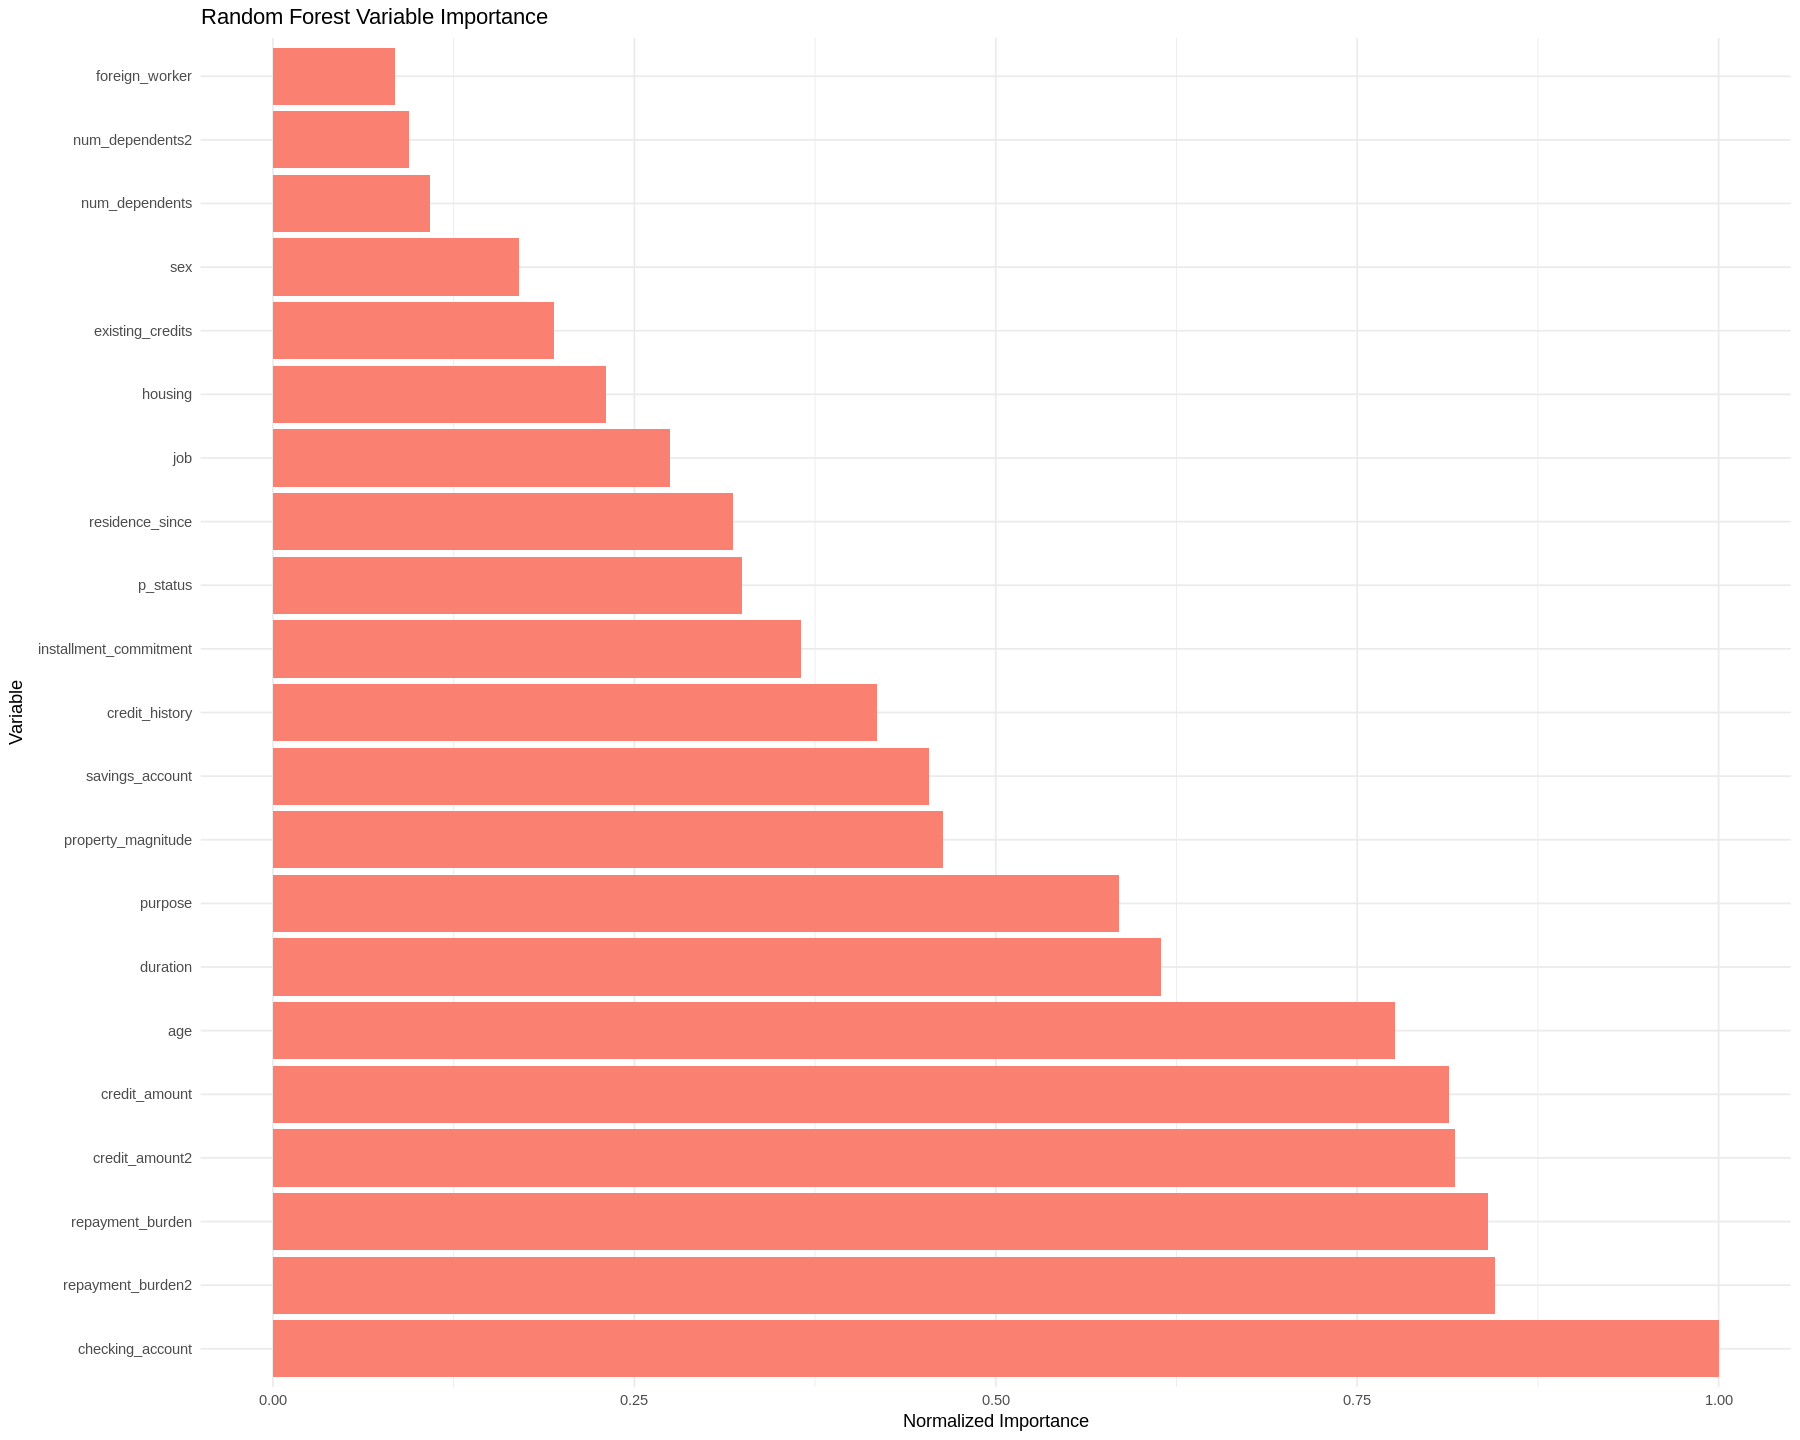

In [10]:
# Random Forest
## Random Forest
ntree_grid  <- 100*c(1:5)
mtry_grid <- 1:(ncol(train_data_balanced) - 1)
results <- expand.grid(ntree = ntree_grid, mtry = mtry_grid)
results$oob_accuracy <- NA
results$test_accuracy <- NA

for (i in 1:nrow(results)) {
    ntree <- results$ntree[i]
    mtry <- results$mtry[i]

    rf <- randomForest(
        x = train_x,
        y = train_y,
        mtry = mtry,
        ntree = ntree
    )

    # Predictions on validation set
    y_pred_val <- predict(rf, test_x)

    # Store OOB and test accuracy
    results$oob_acc[i] <- 1 - mean(rf$err.rate[, "OOB"])
    results$test_acc[i] <- mean(test_y == y_pred_val)
}

# Find the best combination based on test accuracy
best_index <- which.max(results$test_acc)
best_ntree <- results$ntree[best_index]
best_mtry <- results$mtry[best_index]
cat("Best ntree:", best_ntree, ", Best mtry:", best_mtry, "\n")

rf_model <- randomForest(
  class ~ .,
  data = train_data_balanced,
  mtry = best_mtry,
  ntree = best_ntree,
  importance = TRUE
)

rf_predictions <- predict(rf_model, newdata = test_x)
conf_matrix_rf <- confusionMatrix(rf_predictions, test_y)
rf_probabilities <- predict(rf_model, newdata = test_x, type = "prob")
roc_rf <- roc(test_y, rf_probabilities[, "bad"])

### [5.2.1] Variable importance ----
importance_rf <- importance(rf_model) %>% as.data.frame() %>%
  mutate(Normalized = MeanDecreaseGini / max(MeanDecreaseGini, na.rm = TRUE)) %>%
  arrange(desc(Normalized)) %>%
  select(Normalized) %>%
  rownames_to_column(var = "Variable")

ggplot(importance_rf, aes(x = reorder(Variable, -Normalized), y = Normalized)) +
  geom_bar(stat = "identity", fill = "salmon") +
  coord_flip() +
  labs(
    title = "Random Forest Variable Importance",
    x = "Variable",
    y = "Normalized Importance"
  ) +
  theme_minimal()

### XGBoost
XGBoost is an ensemble learning method that sequentially builds an ensemble of weak learners. In the context of credit risk assessment, XGBoost is effective for binary classification problems. By iteratively adding trees and adjusting their predictions, XGBoost can capture complex relationships between features and the target variable. Additionally, XGBoost is less prone to over-fitting.

To optimize the performance of the XGBoost model, a grid search with 7-fold cross-validation is employed. This involves testing different combinations of hyperparameters, such as the number of boosting rounds, learning rate, tree depth, and regularization parameters. By experimenting with different configurations and evaluating their performance on multiple subsets of the data, the optimal settings can be identified.


Setting levels: control = good, case = bad

Setting direction: controls < cases



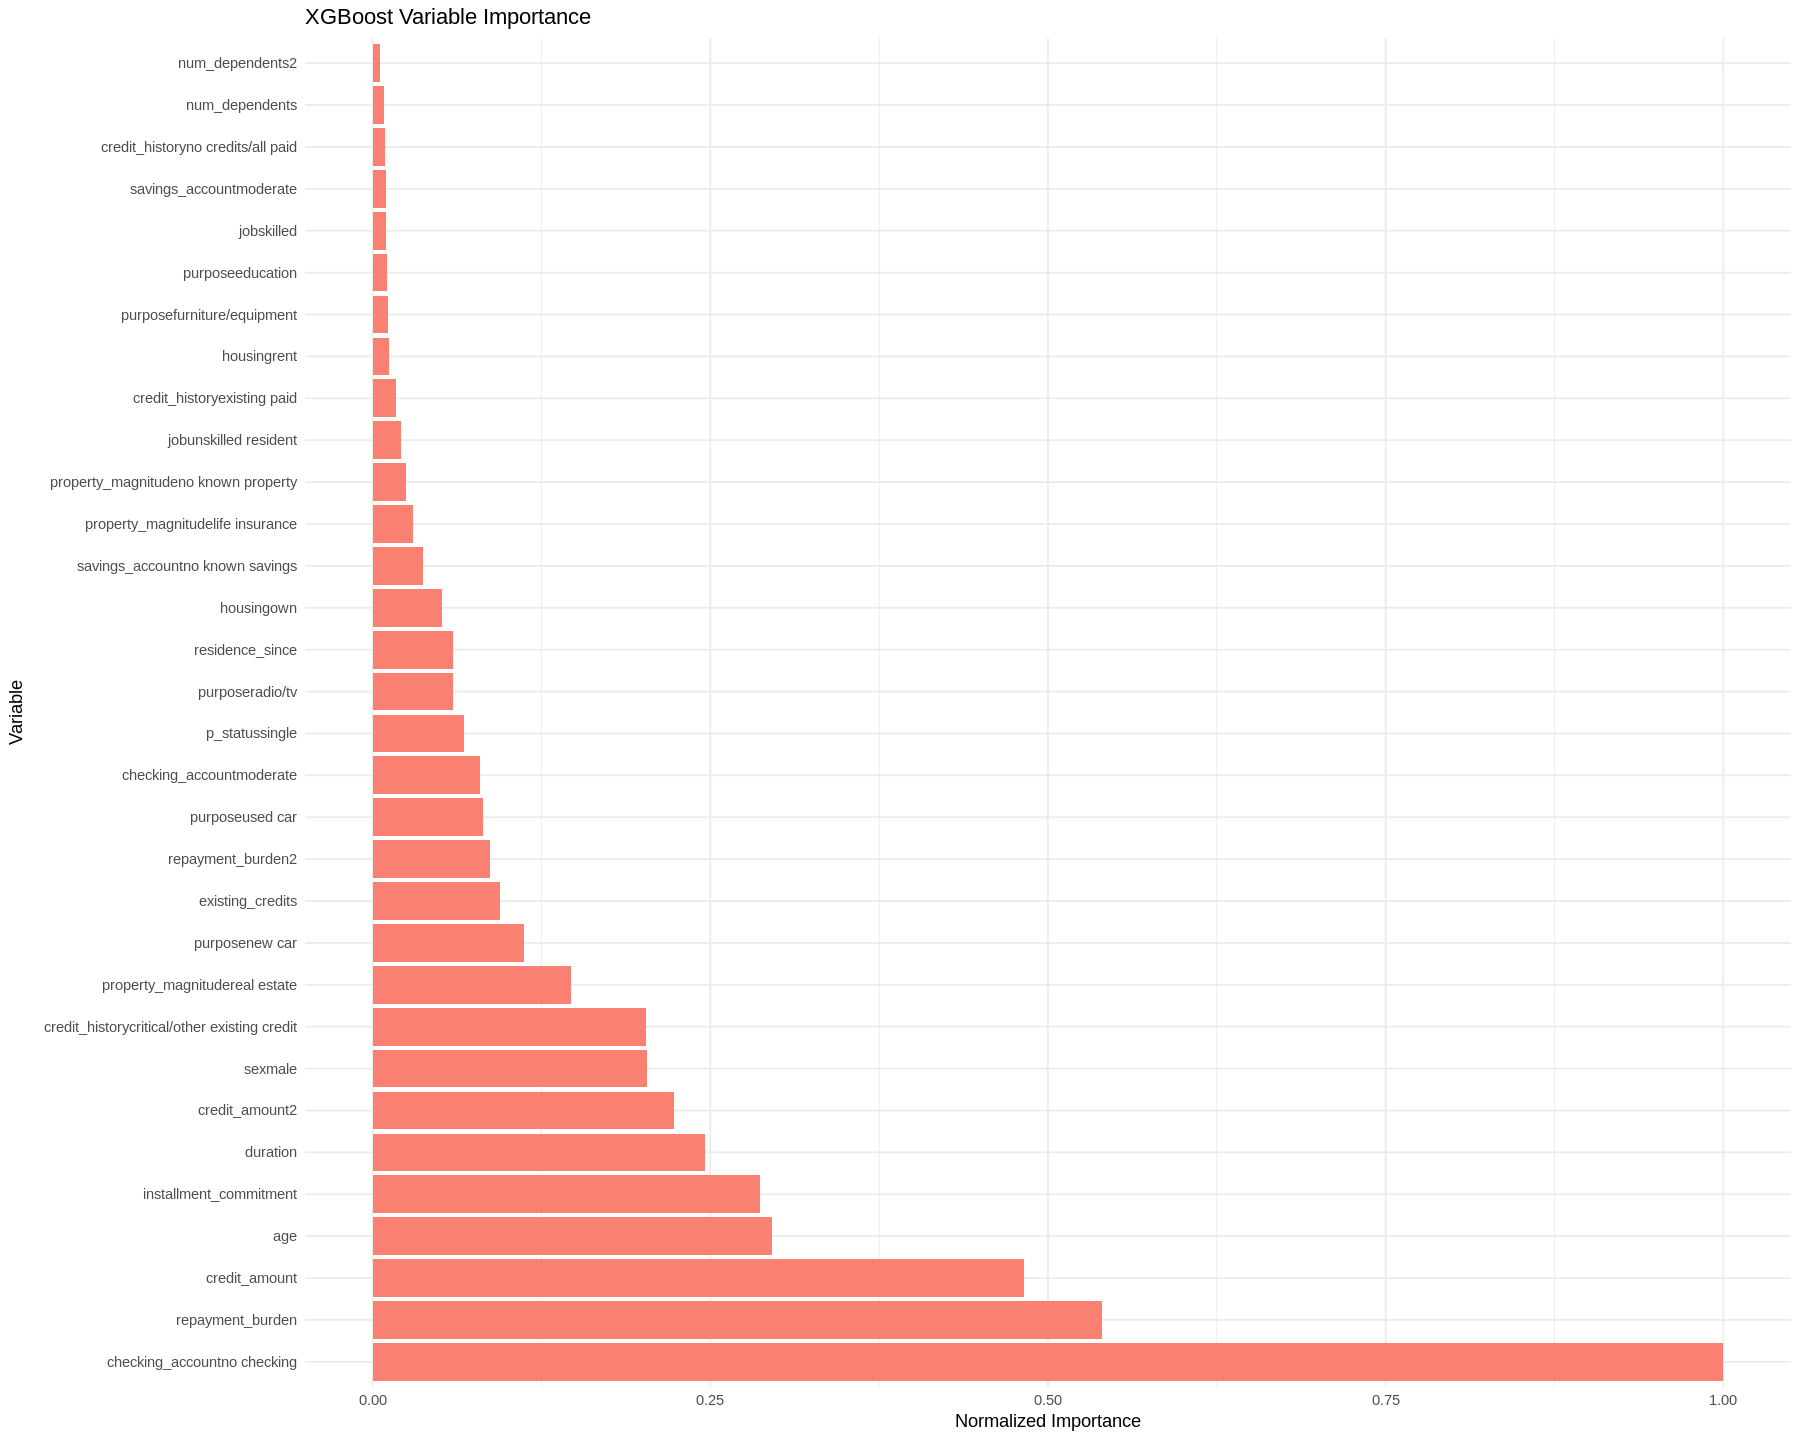

In [11]:
# XGBoost
## XGBoost
train_matrix <- model.matrix(class ~ ., data = train_data_balanced)[, -1]
test_matrix <- model.matrix(~ ., data = test_x)[, -1]
train_label <- train_y
test_label <- test_y

xgb_control <- trainControl(method = "cv", number = 7, verboseIter = FALSE, classProbs = TRUE, summaryFunction = twoClassSummary)

xgb_model <- train(x = train_matrix, y = train_label, method = "xgbTree", trControl = xgb_control, verbosity = 0, metric = 'ROC',
    tuneGrid = expand.grid(nrounds = seq(50, 200, by = 50), max_depth = c(3, 6), eta = c(0.1), gamma = c(0, 0.1), colsample_bytree = 0.8, min_child_weight = c(1,3), subsample = 0.8))

xgb_predictions <- predict(xgb_model, newdata = test_matrix)
conf_matrix_xgb <- confusionMatrix(xgb_predictions, test_label)

xgb_probabilities <- predict(xgb_model, newdata = test_matrix, type = "prob")

roc_xgb <- roc(test_label, xgb_probabilities[, "bad"])
### Variable importance
importance_xgb <- varImp(xgb_model)$importance %>%
  as.data.frame() %>%
  rownames_to_column(var = "Feature") %>%
  mutate(NormalizedImportance = Overall / max(Overall)) %>%
  arrange(desc(NormalizedImportance)) %>%
  select(Feature, NormalizedImportance) %>%
  filter(NormalizedImportance > 0)

ggplot(importance_xgb, aes(x = reorder(Feature, -NormalizedImportance), y = NormalizedImportance)) +
  geom_bar(stat = "identity", fill = "salmon") +
  coord_flip() +
  labs(title = "XGBoost Variable Importance",
       x = "Variable", y = "Normalized Importance") +
  theme_minimal()

### Logit unpenalized and with several penalizations
Several penalized logistic regression models, including ridge, lasso, and elastic net, were implemented to assess credit risk. A grid search with 7-fold cross-validation was used to optimize the alpha parameter, which controls the balance between L1 and L2 regularization. This process identifies the best configuration based on the highest area under the ROC curve (AUC), improving the model's predictive performance while minimizing overfitting.

Ridge and lasso regressions were evaluated alongside elastic net, with coefficients analyzed to understand variable shrinkage. Additionally, an unpenalized logistic regression model was trained for comparison. Model performance was assessed using metrics such as confusion matrices and ROC curves, ensuring robust predictions and interpretability for credit risk assessment.

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”
Setting levels: control = 0, case = 1

Setting direction: controls < cases



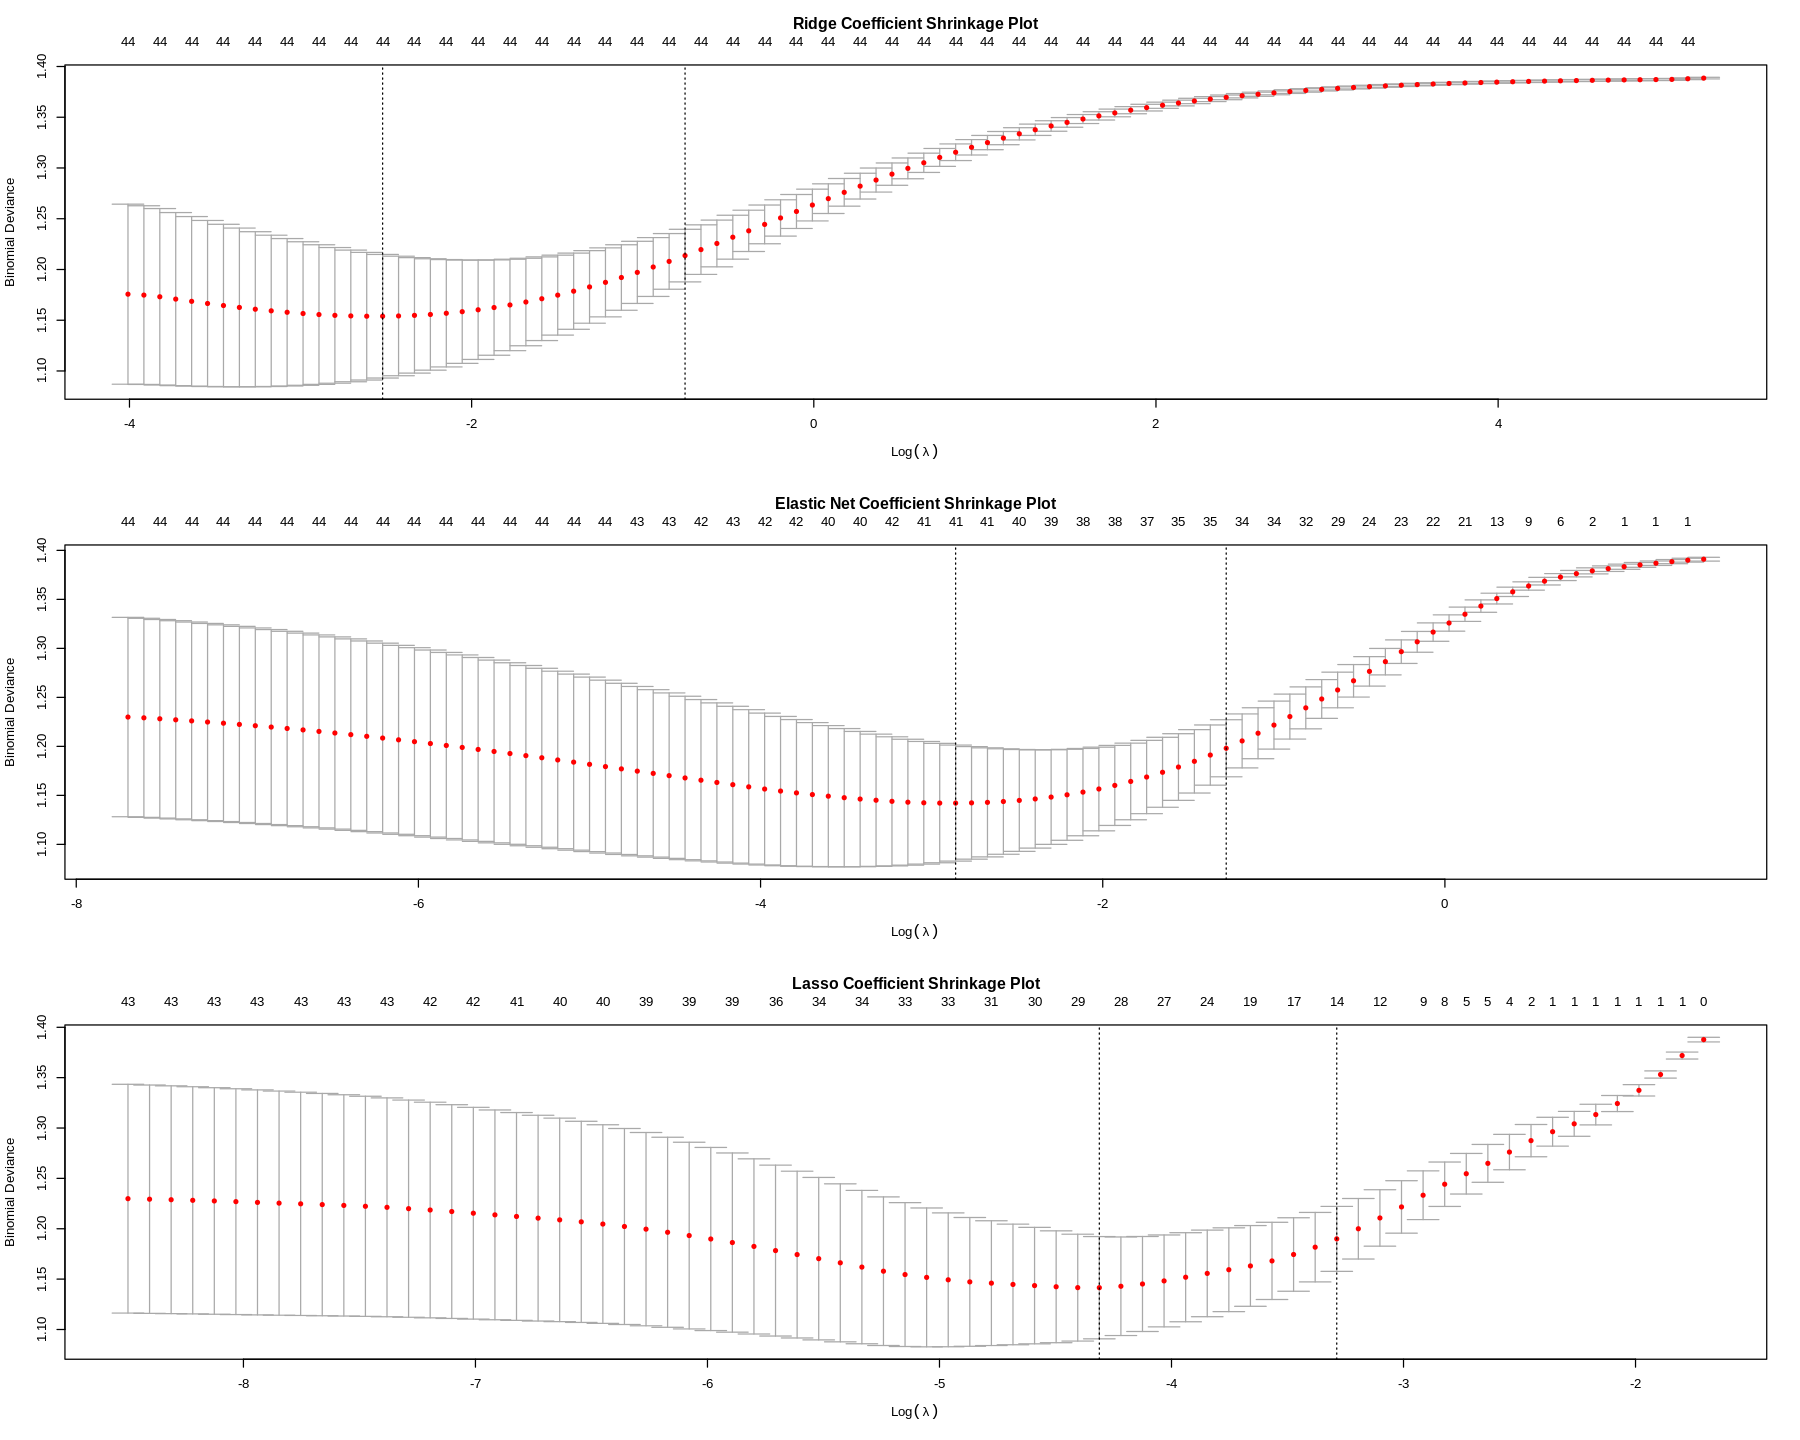

In [12]:
# Elastic Net - Logit
## Elastic net with logit ----
train_matrix <- model.matrix(class ~ ., data = train_data_balanced)[, -1]
test_matrix <- model.matrix(~ ., data = test_x)[, -1]
train_label <- as.numeric(train_y)-1
test_label <- as.numeric(test_y)-1

### Cross-validation to find the best alpha ----
results <- lapply(seq(0, 1, length.out = 51)[-c(1, 51)], function(alpha) {  # Exclude alpha = 0 and alpha = 1
    model <- cv.glmnet(x = train_matrix, y = train_label, family = "binomial", alpha = alpha, nfolds = 7)
    probabilities <- predict(model, newx = test_matrix, s = "lambda.min", type = "response")
    auc <- suppressMessages(roc(test_label, as.vector(probabilities))$auc)
    list(alpha = alpha, model = model, lambda = model$lambda.min, auc = auc)
})

results_df <- do.call(rbind, lapply(results, function(x) data.frame(alpha = x$alpha, lambda = x$lambda, auc = x$auc)))
best_alpha <- results_df[which.max(results_df$auc), "alpha"]
### [5.4.1] Ridge Model ----
ridge_model <- cv.glmnet(x = train_matrix, y = train_label, family = "binomial", alpha = 0, lambda = NULL, nfolds = 7)
ridge_probabilities <- predict(ridge_model, newx = test_matrix, s = "lambda.min", type = "response")
ridge_predictions <- predict(ridge_model, newx = test_matrix, s = "lambda.min", type = "class")
ridge_predictions <- factor(ridge_predictions, levels = c(0, 1))
test_label_factor <- factor(test_label, levels = c(0, 1))
conf_matrix_ridge <- confusionMatrix(ridge_predictions, test_label_factor)
roc_ridge <- roc(test_label, as.numeric(ridge_probabilities))

#### [5.4.1.1] Shrinkage
ridge_coefs_1se <- coef(ridge_model, s = "lambda.1se") %>% as.matrix() %>% as.data.frame() %>% rownames_to_column("variable") %>% rename(lambda_1se = s1)
ridge_coefs_min <- coef(ridge_model, s = "lambda.min") %>% as.matrix() %>% as.data.frame() %>% rownames_to_column("variable") %>% rename(lambda_min = s1)
ridge_coefs <- left_join(ridge_coefs_1se, ridge_coefs_min, by = "variable") %>% filter(lambda_min != 0 | lambda_1se != 0)

### [5.4.2] Elastic net ----
elastic_net_model <- cv.glmnet(x = train_matrix, y = train_label, family = "binomial", alpha = best_alpha, lambda = NULL, nfolds = 7)
elastic_net_probabilities <- predict(elastic_net_model, newx = test_matrix, s = "lambda.min", type = "response")
elastic_net_predictions <- predict(elastic_net_model, newx = test_matrix, s = "lambda.min", type = "class")
elastic_net_predictions <- factor(elastic_net_predictions, levels = c(0, 1))
test_label_factor <- factor(test_label, levels = c(0, 1))
conf_matrix_elastic <- confusionMatrix(elastic_net_predictions, test_label_factor)
roc_elastic <- roc(test_label, as.numeric(elastic_net_probabilities))

#### [5.4.2.1] Shrinkage
elastic_coefs_1se <- coef(elastic_net_model, s = "lambda.1se")%>% as.matrix() %>% as.data.frame() %>% rownames_to_column("variable") %>% rename(lambda_1se = s1)
elastic_coefs_min <- coef(elastic_net_model, s = "lambda.min")%>% as.matrix() %>% as.data.frame() %>% rownames_to_column("variable") %>% rename(lambda_min = s1)
elastic_coefs <- left_join(elastic_coefs_1se, elastic_coefs_min, by = "variable") %>% filter(lambda_min != 0 | lambda_1se != 0)

### [5.4.3] Lasso ----
lasso_model <- cv.glmnet(x = train_matrix, y = train_label, family = "binomial", alpha = 1, lambda = NULL, nfolds = 7)
lasso_probabilities <- predict(lasso_model, newx = test_matrix, s = "lambda.min", type = "response")
lasso_predictions <- predict(lasso_model, newx = test_matrix, s = "lambda.min", type = "class")
lasso_predictions <- factor(lasso_predictions, levels = c(0, 1))
test_label_factor <- factor(test_label, levels = c(0, 1))
conf_matrix_lasso <- confusionMatrix(lasso_predictions, test_label_factor)
roc_lasso <- roc(test_label, as.numeric(lasso_probabilities))

#### [5.4.3.1] Shrinkage
lasso_coefs_min <- coef(lasso_model, s = "lambda.min")%>% as.matrix() %>% as.data.frame() %>% rownames_to_column("variable") %>% rename(lambda_min = s1)
lasso_coefs_1se <- coef(lasso_model, s = "lambda.1se")%>% as.matrix() %>% as.data.frame() %>% rownames_to_column("variable") %>% rename(lambda_1se = s1)
lasso_coefs <- left_join(lasso_coefs_1se, lasso_coefs_min, by = "variable") %>% filter(lambda_min != 0 | lambda_1se != 0)

### [5.4.4] Logit without penalization ----
control <- trainControl(method = "cv", number = 7, classProbs = TRUE, summaryFunction = twoClassSummary)
logit_model <- train(class ~ ., data = train_data_balanced, family=binomial(logit), method = 'glm',trControl = control)
logit_probabilities <- predict(logit_model, newdata = test_x, type = "prob")
logit_predictions <- predict(logit_model, newdata = test_x, type = 'raw')
test_label <- factor(test_label, label = c('good', 'bad'), levels = c(0, 1))
conf_matrix_logit <- confusionMatrix(logit_predictions, test_label)
roc_logit <- roc(as.numeric(test_label)-1, logit_probabilities[,'bad'])


## [6.3] Shrinkage plots and tables ----
par(mfrow = c(3, 1))
plot(ridge_model)
title("Ridge Coefficient Shrinkage Plot\n")
plot(elastic_net_model)
title("Elastic Net Coefficient Shrinkage Plot\n")
plot(lasso_model)
title("Lasso Coefficient Shrinkage Plot\n")
par(mfrow = c(1, 1))

The above shrinkage plots show the trade-off between model complexity (non-zero coefficients) and goodness-of-fit (binomial deviance). The optimal λ values (lambda.min and lambda.1se) balance this trade-off. Ridge retains all parameters with shrinkage, Elastic Net balances shrinkage and sparsity, and Lasso achieves sparsity by eliminating coefficients. Choosing λ one standard error from the minimum binomial deviance improves interpretability by reducing parameters. For example, Lasso reduces parameters from 27–28 to 14–17, while Elastic Net removes about five. Prioritizing accuracy, we proceed with the parameters at minimum binomial deviance.

### Results - Accuracy
The model comparison plot reveals interesting insights into the performance of various models for credit risk assessment. XGBoost stands out as the top-performing model with the highest accuracy and the tightest confidence interval. This suggests that XGBoost's ability to sequentially build an ensemble of models, combined with its regularization techniques, effectively captures complex patterns in the data and generalizes well to unseen data.

Ensemble methods like Random Forest and XGBoost generally outperform simpler models like Logistic Regression and its regularized variants (Ridge, Lasso, Elastic Net). This highlights the advantage of combining multiple models to improve predictive accuracy and reduce overfitting. However, the performance differences between these models are relatively small, indicating that careful model selection and hyperparameter tuning are crucial to achieve optimal results.

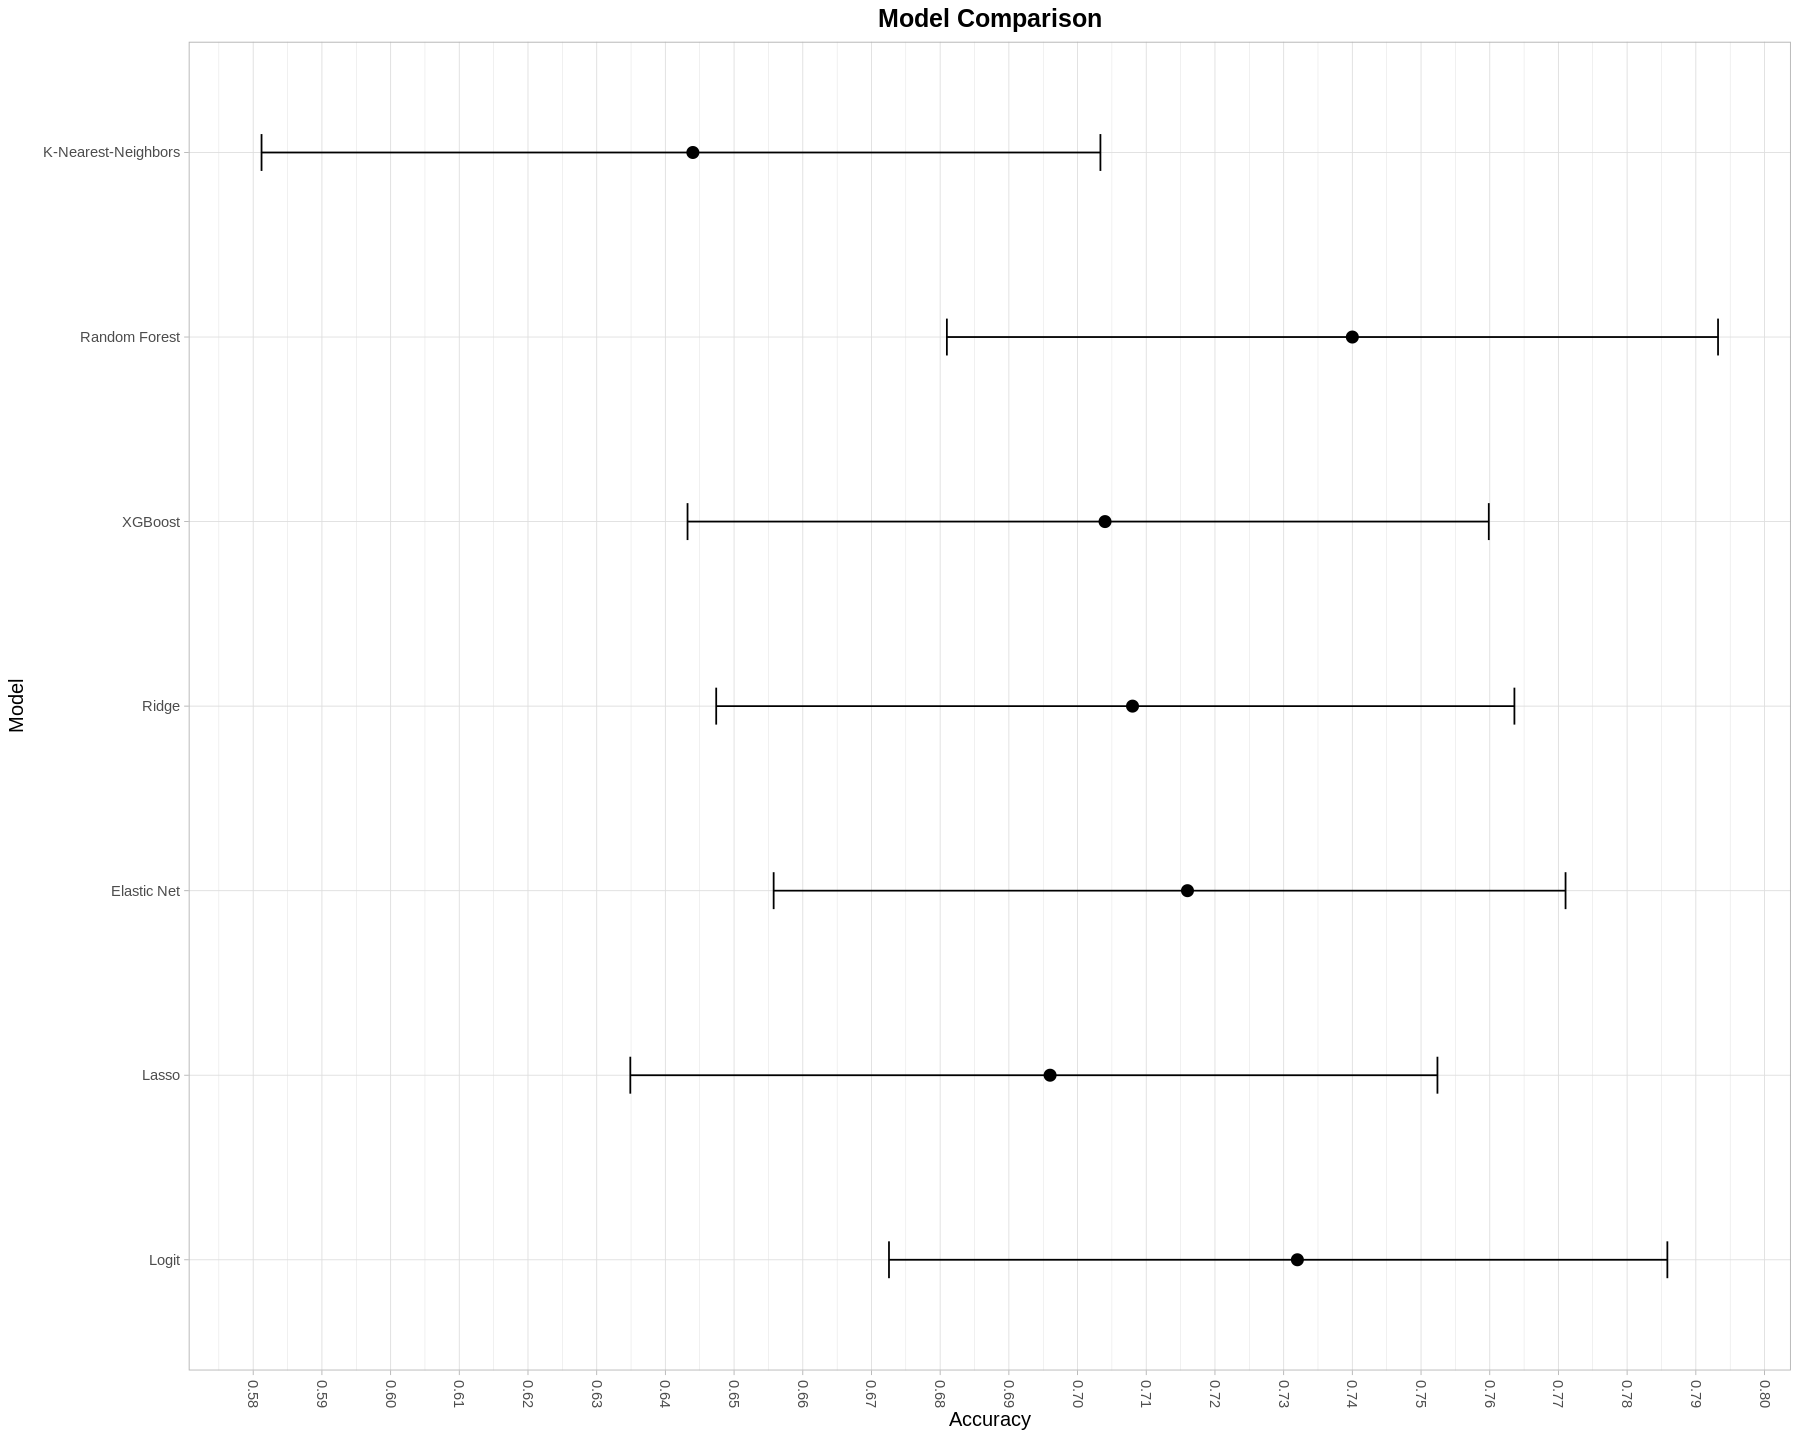

In [13]:
# @title Accuracy plots
# [6] Results ----
## [6.1] Accuracy ----
# Get all the confusion matrices in a list for comparison
confusion_matrices <- list(knn = conf_matrix_knn, rf = conf_matrix_rf, xgb = conf_matrix_xgb, ridge = conf_matrix_ridge, elastic_net = conf_matrix_elastic, lasso = conf_matrix_lasso, logit = conf_matrix_logit)

## Get the accuracy, and the CI into a dataframe
accuracy <- data.frame(model = names(confusion_matrices),
                      accuracy = sapply(confusion_matrices, function(x) x$overall["Accuracy"]),
                      lower_ci = sapply(confusion_matrices, function(x) x$overall["AccuracyLower"]),
                      upper_ci = sapply(confusion_matrices, function(x) x$overall["AccuracyUpper"]))
rownames(accuracy) <- NULL
accuracy  <- accuracy %>% mutate(model = case_when(model == "knn" ~ "K-Nearest-Neighbors",
                                                   model == "rf" ~ "Random Forest",
                                                   model == "xgb" ~ "XGBoost",
                                                   model == "ridge" ~ "Ridge",
                                                   model == "elastic_net" ~ "Elastic Net",
                                                   model == "lasso" ~ "Lasso",
                                                   model == 'logit' ~ "Logit")) %>%
            mutate(model = fct_relevel(model, "Logit", "Lasso", "Elastic Net", "Ridge", "XGBoost", "Random Forest", "K-Nearest-Neighbors"))

# plot this results in a geom_point plot with error bars
ggplot(accuracy, aes(x = model, y = accuracy)) +
    geom_point(size = 3) +
    geom_errorbar(aes(ymin = lower_ci, ymax = upper_ci), width = 0.2) +
    labs(y = "Accuracy", x = "Model", title = "Model Comparison") +
    theme_light() + coord_flip() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 15),
          strip.text.x = element_text(face = "bold", color = "black", size = 12),
          axis.title.y = element_text(size = 12),
          axis.title.x = element_text(size = 12),
          axis.text.x = element_text(angle = 270, vjust = 0.5, hjust=1)) +
    scale_y_continuous(n.breaks = 20)

### Results - ROC Curves and AUC

The ROC curve visually compares the performance of various models in distinguishing between positive and negative classes. Random Forest achieves the highest AUC-ROC score (0.813), indicating its superior ability to predict credit risk. XGBoost also performs well, with an AUC of 0.791, showcasing its effectiveness in handling complex patterns. Ridge and Elastic Net models follow closely with AUC values of 0.788, demonstrating strong predictive capabilities. Lasso and standard Logistic Regression models exhibit slightly lower AUC scores but remain competitive, highlighting their utility in specific scenarios.

K-Nearest Neighbors (KNN) has the lowest AUC (0.716), indicating weaker discriminative ability compared to the other methods. Despite this, simpler models like Logistic Regression and its regularized versions may still be preferred in applications where model interpretability or computational efficiency is crucial. Ultimately, the choice of the best model depends on the specific requirements of the credit risk assessment task, such as the need for accuracy, interpretability, or scalability.

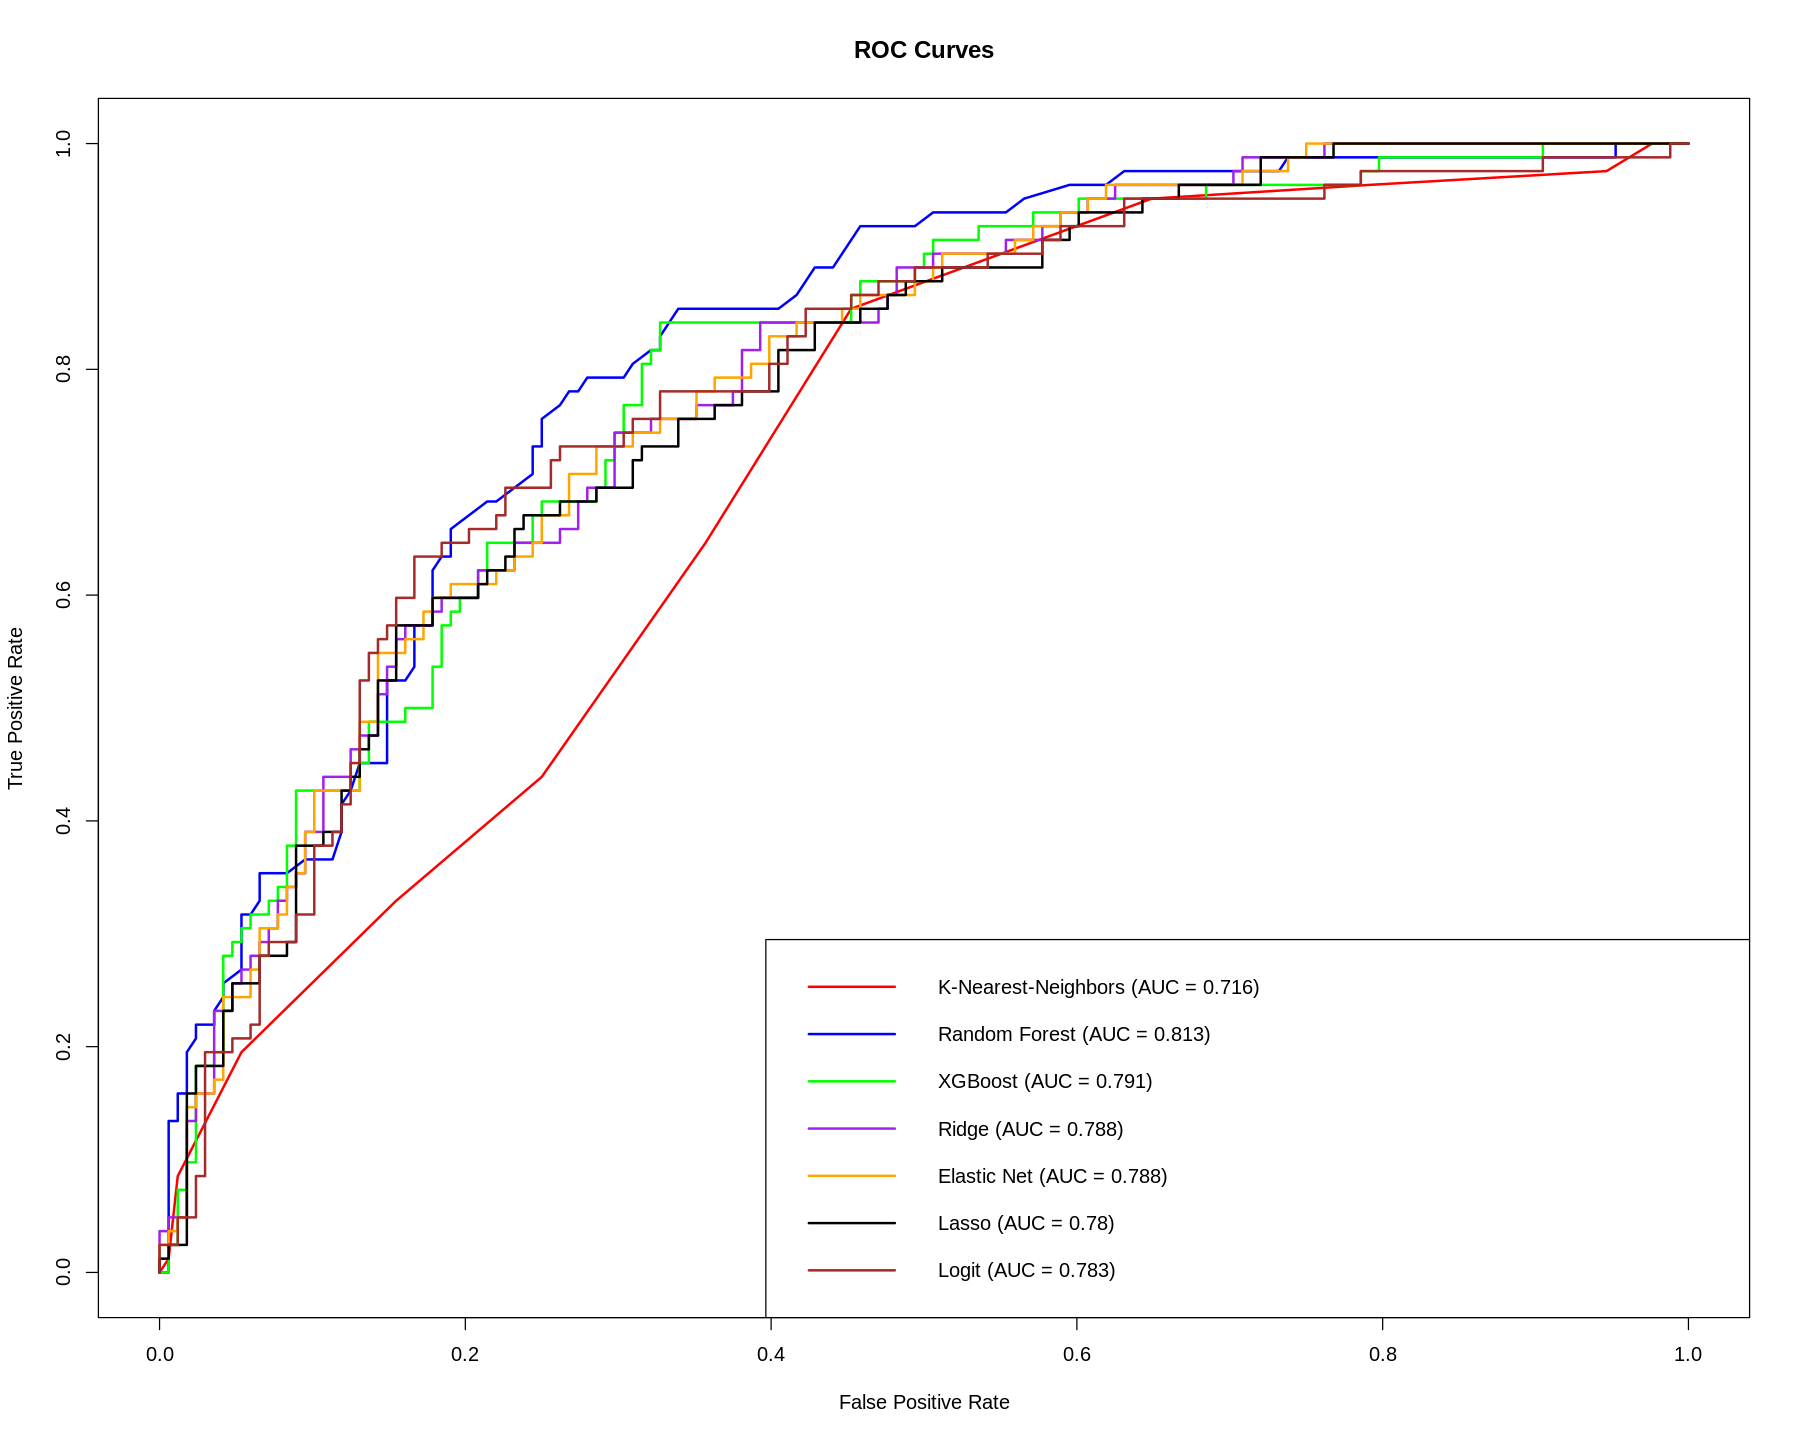

In [14]:
# @title ROC - Plots - AUC Scores
## [6.2] ROC Curves ----
# Plot all the roc curves with the AUC in the legend with the plot function
plot(y=roc_knn$sensitivities, x=1-roc_knn$specificities, col = "red", lwd = 2, type = "l", main = "ROC Curves", xlab = "False Positive Rate", ylab = "True Positive Rate")
lines(y=roc_rf$sensitivities, x=1-roc_rf$specificities, col = "blue", lwd = 2)
lines(y=roc_xgb$sensitivities, x=1-roc_xgb$specificities, col = "green", lwd = 2)
lines(y=roc_ridge$sensitivities, x=1-roc_ridge$specificities, col = "purple", lwd = 2)
lines(y=roc_elastic$sensitivities, x=1-roc_elastic$specificities, col = "orange", lwd = 2)
lines(y=roc_lasso$sensitivities, x=1-roc_lasso$specificities, col = "black", lwd = 2)
lines(y=roc_logit$sensitivities, x=1-roc_logit$specificities, col = "brown", lwd = 2)
legend("bottomright",
       legend = c(
         paste0("K-Nearest-Neighbors (AUC = ", round(auc(roc_knn), 3), ")"),
         paste0("Random Forest (AUC = ", round(auc(roc_rf), 3), ")"),
         paste0("XGBoost (AUC = ", round(auc(roc_xgb), 3), ")"),
         paste0("Ridge (AUC = ", round(auc(roc_ridge), 3), ")"),
         paste0("Elastic Net (AUC = ", round(auc(roc_elastic), 3), ")"),
         paste0("Lasso (AUC = ", round(auc(roc_lasso), 3), ")"),
          paste0("Logit (AUC = ", round(auc(roc_logit), 3), ")")
       ),
       col = c("red", "blue", "green", "purple", "orange", "black", "brown"),
       lwd = 2)


## Conclusions
The project focused on predicting credit risk using the German Credit Dataset, using a range of machine learning models to evaluate their effectiveness. Through data cleaning and preparation, the dataset was transformed into a structured, normalized format, ready for analysis. Key steps included selecting relevant features, simplifying categorical variables, engineering new features such as repayment burden, and applying normalization and encoding. These processes ensured the dataset was suitable for modeling.

The analysis implemented and compared six machine learning models: K-Nearest Neighbors (KNN), Random Forest, XGBoost, Ridge Regression, Lasso Regression, and Elastic Net. Each model was optimized using cross-validation and parameter tuning to achieve the best possible performance. The results, visualized in the model comparison graph, demonstrated that ensemble methods like Random Forest and XGBoost consistently outperformed simpler algorithms. XGBoost achieved the highest accuracy, with its ability to handle complex patterns and effective regularization standing out as key strengths. Random Forest followed closely, showcasing its robustness and reliability across multiple tests.

The logistic regression models, particularly Elastic Net, provided a balance between accuracy and interpretability. While their performance was slightly lower than the ensemble methods, they remain valuable for scenarios where transparency is critical. KNN, on the other hand, had the lowest accuracy and highest variability, highlighting its limitations in datasets with high dimensionality and complex relationships.

In conclusion, the comparison of models emphasized that ensemble methods are highly effective for datasets with non-linear relationships and interactions, while simpler models like logistic regression retain their relevance in contexts requiring clear and interpretable outputs.

This project demonstrated how machine learning can improve decision-making in credit risk assessment. By preparing the data and evaluating multiple models, it was possible to identify the most effective approach, providing valuable insights in financial modeling.